In [1]:
import pandas as pd
import seaborn as sns # for data visualization
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mtick # For specifying the axes tick format
import matplotlib as mpl


In [2]:
# IMPORT DATASET
# DIMENSIONI DATASET: (36275, 19)
df = pd.read_csv('/home/aurora/progetto/dataset/Hotel_Reservations.csv') #per host remoto
#df = pd.read_csv('C:/Users/Aurora/Desktop/universita/machine learning/LAB/progetto/dataset/hotel_reservations.csv') #per host locale
data = df.copy() #per non modificare il dataset originale, lavorerò su una copia "data"
# print(f"\ndimensione dataset: {data.shape}\n")
data.shape
target = data['booking_status']

In [3]:
#TODO: EDA
#visualizzazione preliminare di informazioni del dataset
#features dei campioni del dataset
features = list(set(data.columns) - {'target'})
print("lista features : ",features)

data.head(10)

lista features :  ['arrival_year', 'no_of_weekend_nights', 'lead_time', 'no_of_previous_cancellations', 'booking_status', 'type_of_meal_plan', 'Booking_ID', 'no_of_children', 'market_segment_type', 'room_type_reserved', 'repeated_guest', 'arrival_date', 'arrival_month', 'no_of_adults', 'no_of_special_requests', 'required_car_parking_space', 'avg_price_per_room', 'no_of_previous_bookings_not_canceled', 'no_of_week_nights']


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
5,INN00006,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9,13,Online,0,0,0,115.00,1,Canceled
6,INN00007,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,2017,10,15,Online,0,0,0,107.55,1,Not_Canceled
7,INN00008,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,2018,12,26,Online,0,0,0,105.61,1,Not_Canceled
8,INN00009,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,2018,7,6,Offline,0,0,0,96.90,1,Not_Canceled
9,INN00010,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,2018,10,18,Online,0,0,0,133.44,3,Not_Canceled


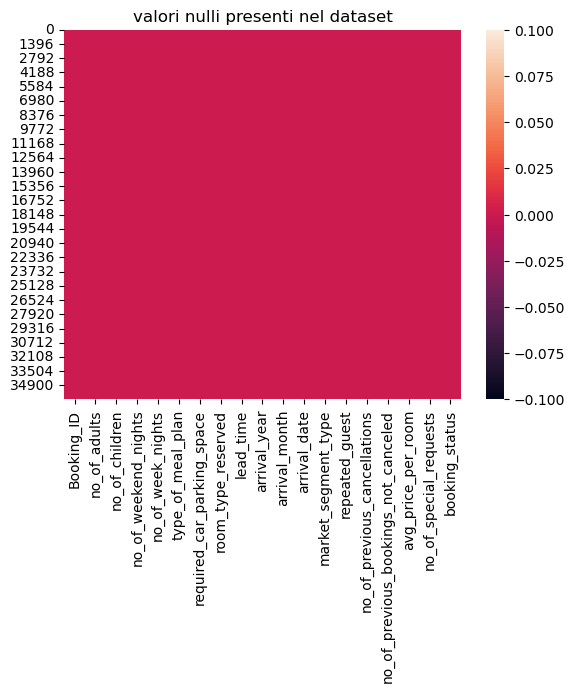


controllo se alcuni valori sono nulli: 
 Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64 



In [4]:
# da una prima visualizzazione, sembra che non ci siano valori nulli nel dataset
sns.heatmap(data.isnull())
plt.title("valori nulli presenti nel dataset")
plt.show()
#Preso da "churn.py", vedi se può essere utile: data.TotalCharges = pd.to_numeric(data.TotalCharges, errors='coerce') #serve a convertire la colonna in numerica; "errors='coerce'" serve a convertire i valori non numerici in NaN
print("\ncontrollo se alcuni valori sono nulli:", "\n", data.isnull().sum(), "\n") #conteggio del numero di valori mancanti (nulli) per ciascuna colonna nel dataset
#Sembra che non ci siano valori nulli nel dataset da gestire, dunque non c'è bisogno di eseguire alcuna operazione per gestire i valori nulli


In [5]:
# visualizzazione "tipi" dei dati
print("\ndomini delle features:\n",data.dtypes)
# sono molte features object, vanno tutte gestite


domini delle features:
 Booking_ID                               object
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object


In [6]:
#QUI C'ERA LA VECCHIA CORRELATION MATRIX, MA CON FEATURE CATEGORICHE NON POTEVO

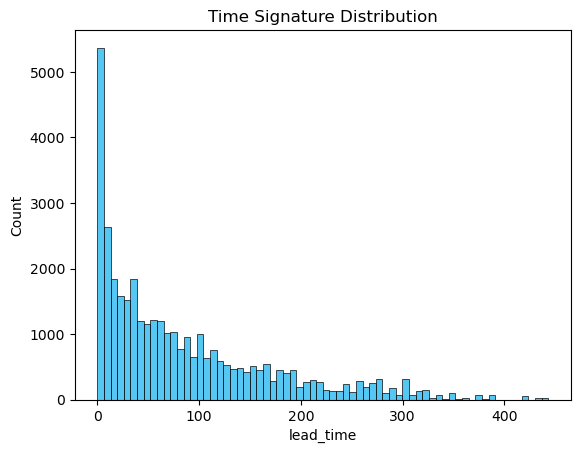

In [7]:
#TODO: qua preso da PaoloSpeziali
hist_color = '#1DB4F0'
#Visualizzazione temporale di "lead_time", cioè del n° di giorni che intercorrono tra la data di prenotazione e la data di arrivo; e poi di "arrival_year"
sns.histplot(data['lead_time'], color= hist_color).set_title('Time Signature Distribution')
plt.show()


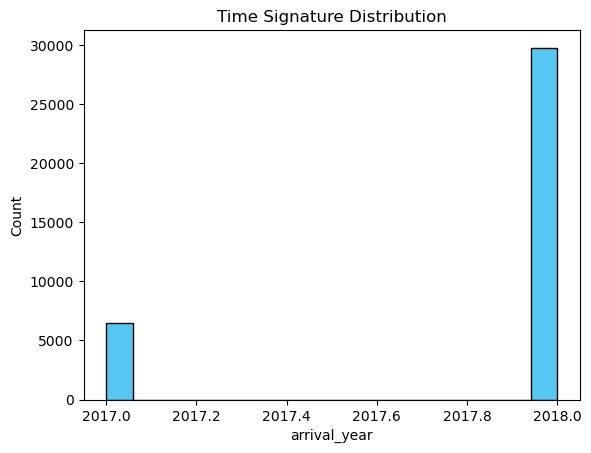

In [8]:
sns.histplot(data['arrival_year'], color= hist_color).set_title('Time Signature Distribution')
plt.show()#qui mostra che i dati sono distribuiti in modo uniforme nel tempo (o nel 2017 o nel 2018), quindi (forse) non c'è bisogno di fare feature engineering per gestire la temporalità


Text(0.5, 1.0, "percentuale della \n 'room_type_reserved' selezionata")

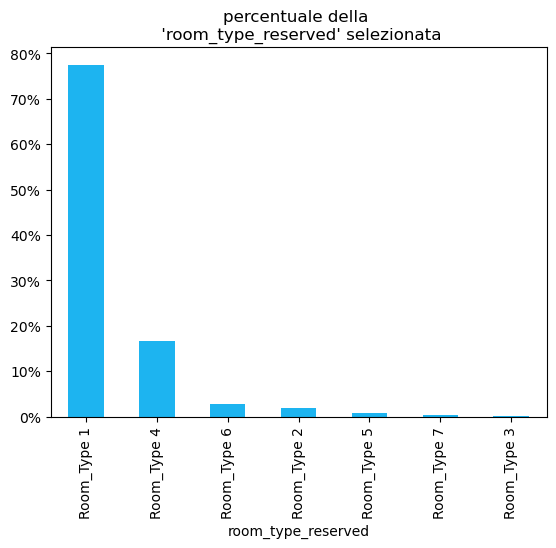

In [9]:
#TODO: preso da churn.py
#ora vediamo la distribuzione delle feature categoriche
#Iniziamo da "room_type_reserved"
figure = (data['room_type_reserved'].value_counts()*100.0 /len(data)).plot(kind='bar',
                                                                           stacked=True, color = hist_color) #qui plotta la distribuzione di una feature categorica; dove "*100.0 /len(churn_df)" serve a convertire i valori in percentuale
figure.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title("percentuale della \n 'room_type_reserved' selezionata")

#notiamo che la maggior parte delle prenotazioni sono per le stanze "1" e "4", mentre le stanze "5" e "7" sono molto meno richieste e la stanza 3 non è mai stata prenotata


In [10]:
#stampo la percentuale di prenotazioni per ogni tipo di stanza, vedendo che la 3, la 5 e la 7 non sono mai state prenotate quindi non sono molto utili
room_types = ['Room_Type 1', 'Room_Type 2', 'Room_Type 3', 'Room_Type 4', 'Room_Type 5', 'Room_Type 6', 'Room_Type 7']

for room_type in room_types:
    percentage = (data['room_type_reserved'] == room_type).mean() * 100
    print(f'Percentuale di "{room_type}": {percentage:.2f}%')


Percentuale di "Room_Type 1": 77.55%
Percentuale di "Room_Type 2": 1.91%
Percentuale di "Room_Type 3": 0.02%
Percentuale di "Room_Type 4": 16.70%
Percentuale di "Room_Type 5": 0.73%
Percentuale di "Room_Type 6": 2.66%
Percentuale di "Room_Type 7": 0.44%


In [11]:
# # Elenco dei valori da raggruppare come "Other"
# values_to_group = ['Room_Type 3', 'Room_Type 5', 'Room_Type 7']

# # Crea una nuova colonna 'room_type_grouped' con i valori raggruppati come "Other" se si trovano nell'elenco sopra
# data['other'] = data['room_type_reserved'].apply(lambda x: x if x not in values_to_group else 'Other')
# figure = (data['other'].value_counts()*100.0 /len(data)).plot(kind='bar',
#                                                                            stacked=True, color = hist_color) #qui plotta la distribuzione di una feature categorica; dove "*100.0 /len(churn_df)" serve a convertire i valori in percentuale
# figure.yaxis.set_major_formatter(mtick.PercentFormatter())
# plt.title("percentuale della \n 'room_type_reserved' selezionata")



(array([0, 1, 2, 3]),
 [Text(0, 0, 'Meal Plan 1'),
  Text(1, 0, 'Not Selected'),
  Text(2, 0, 'Meal Plan 2'),
  Text(3, 0, 'Meal Plan 3')])

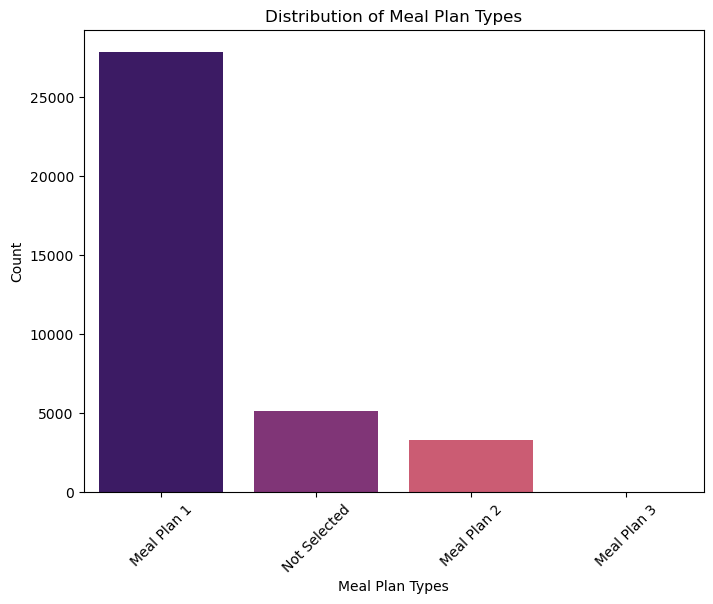

In [12]:
meal_plan_counts = data['type_of_meal_plan'].value_counts() #qui conta il numero di occorrenze per ogni tipo di piano pasto
# Crea il grafico a barre
plt.figure(figsize=(8, 6))
sns.barplot(x=meal_plan_counts.index, y=meal_plan_counts.values, palette="magma")
# Aggiungi etichette e titolo
plt.xlabel('Meal Plan Types')
plt.ylabel('Count')
plt.title('Distribution of Meal Plan Types')
# Ruota le etichette sull'asse x per la leggibilità
plt.xticks(rotation=45)
# Mostra il grafico
# plt.tight_layout()

#Vediamo che la maggior parte delle prenotazioni prevede "Meal Plan 1", poi altre non prevedono alcun piano pasto, mentre le prenotazioni con piano pasto "BB"(credo tipo 3) sono molto meno frequenti


VARIABILI CATEGORICHE

<Axes: title={'center': 'Variable arrival_year'}, xlabel='arrival_year', ylabel='count'>

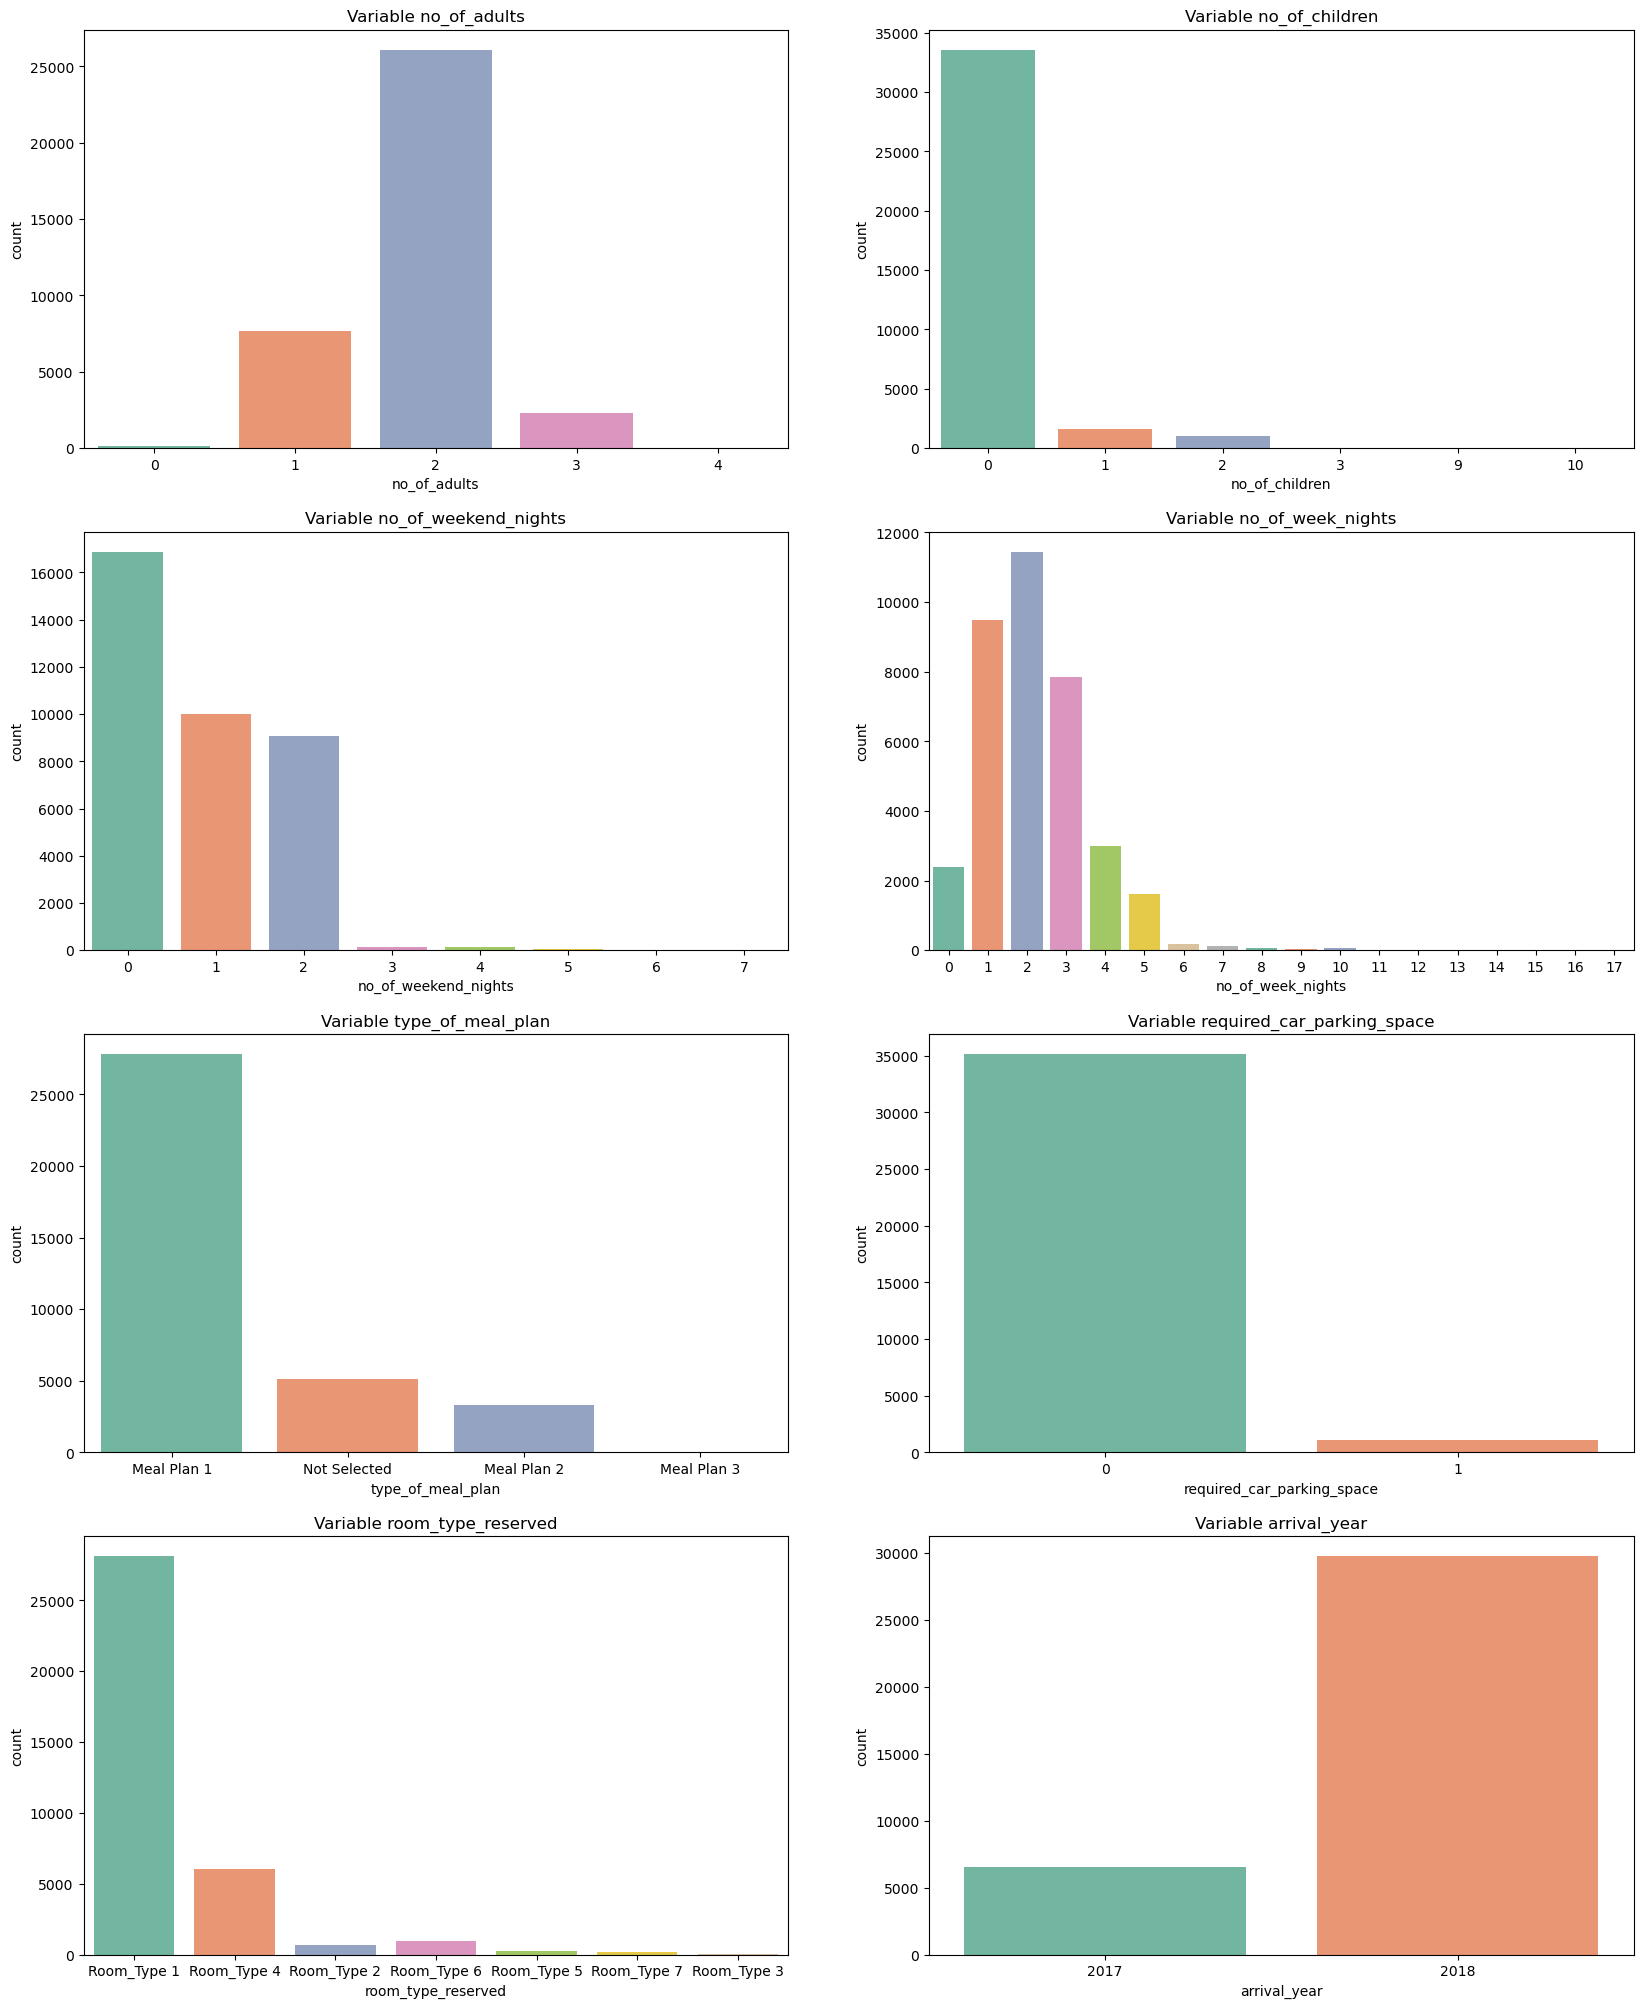

In [13]:
#TODO: grafici di EDA presi da: https://www.kaggle.com/code/raphaelmarconato/hotel-reservations-eda-balancing-and-ml-93-4

plt.figure(figsize = (20,25))
plt.subplot(4,2,1)
plt.gca().set_title('Variable no_of_adults')
sns.countplot(x = 'no_of_adults', palette = 'Set2', data = df)

plt.subplot(4,2,2)
plt.gca().set_title('Variable no_of_children')
sns.countplot(x = 'no_of_children', palette = 'Set2', data = df)

plt.subplot(4,2,3)
plt.gca().set_title('Variable no_of_weekend_nights')
sns.countplot(x = 'no_of_weekend_nights', palette = 'Set2', data = df)

plt.subplot(4,2,4)
plt.gca().set_title('Variable no_of_week_nights')
sns.countplot(x = 'no_of_week_nights', palette = 'Set2', data = df)

plt.subplot(4,2,5)
plt.gca().set_title('Variable type_of_meal_plan')
sns.countplot(x = 'type_of_meal_plan', palette = 'Set2', data = df)

plt.subplot(4,2,6)
plt.gca().set_title('Variable required_car_parking_space')
sns.countplot(x = 'required_car_parking_space', palette = 'Set2', data = df)

plt.subplot(4,2,7)
plt.gca().set_title('Variable room_type_reserved')
sns.countplot(x = 'room_type_reserved', palette = 'Set2', data = df)

plt.subplot(4,2,8)
plt.gca().set_title('Variable arrival_year')
sns.countplot(x = 'arrival_year', palette = 'Set2', data = df)
# Aumenta lo spazio verticale tra i subplot
# plt.subplots_adjust(hspace=1.0)



Osservando le variabili categoriali, si può vedere che: la maggior parte delle prenotazioni riguardano camere con due adulti, senza bambini;
generalmente le prenotazioni sono a breve termine, non molti casi sono a lungo termine;
la maggior parte delle prenotazioni seleziona meal_plan_1 e non ha bisogno di un posto auto;
i tipi di camera più prenotati sono i tipi 1 e 4; infine, la maggior parte dei dati è riguarda prenotazioni del 2018.

<Axes: title={'center': 'Variable booking_status'}, xlabel='booking_status', ylabel='count'>

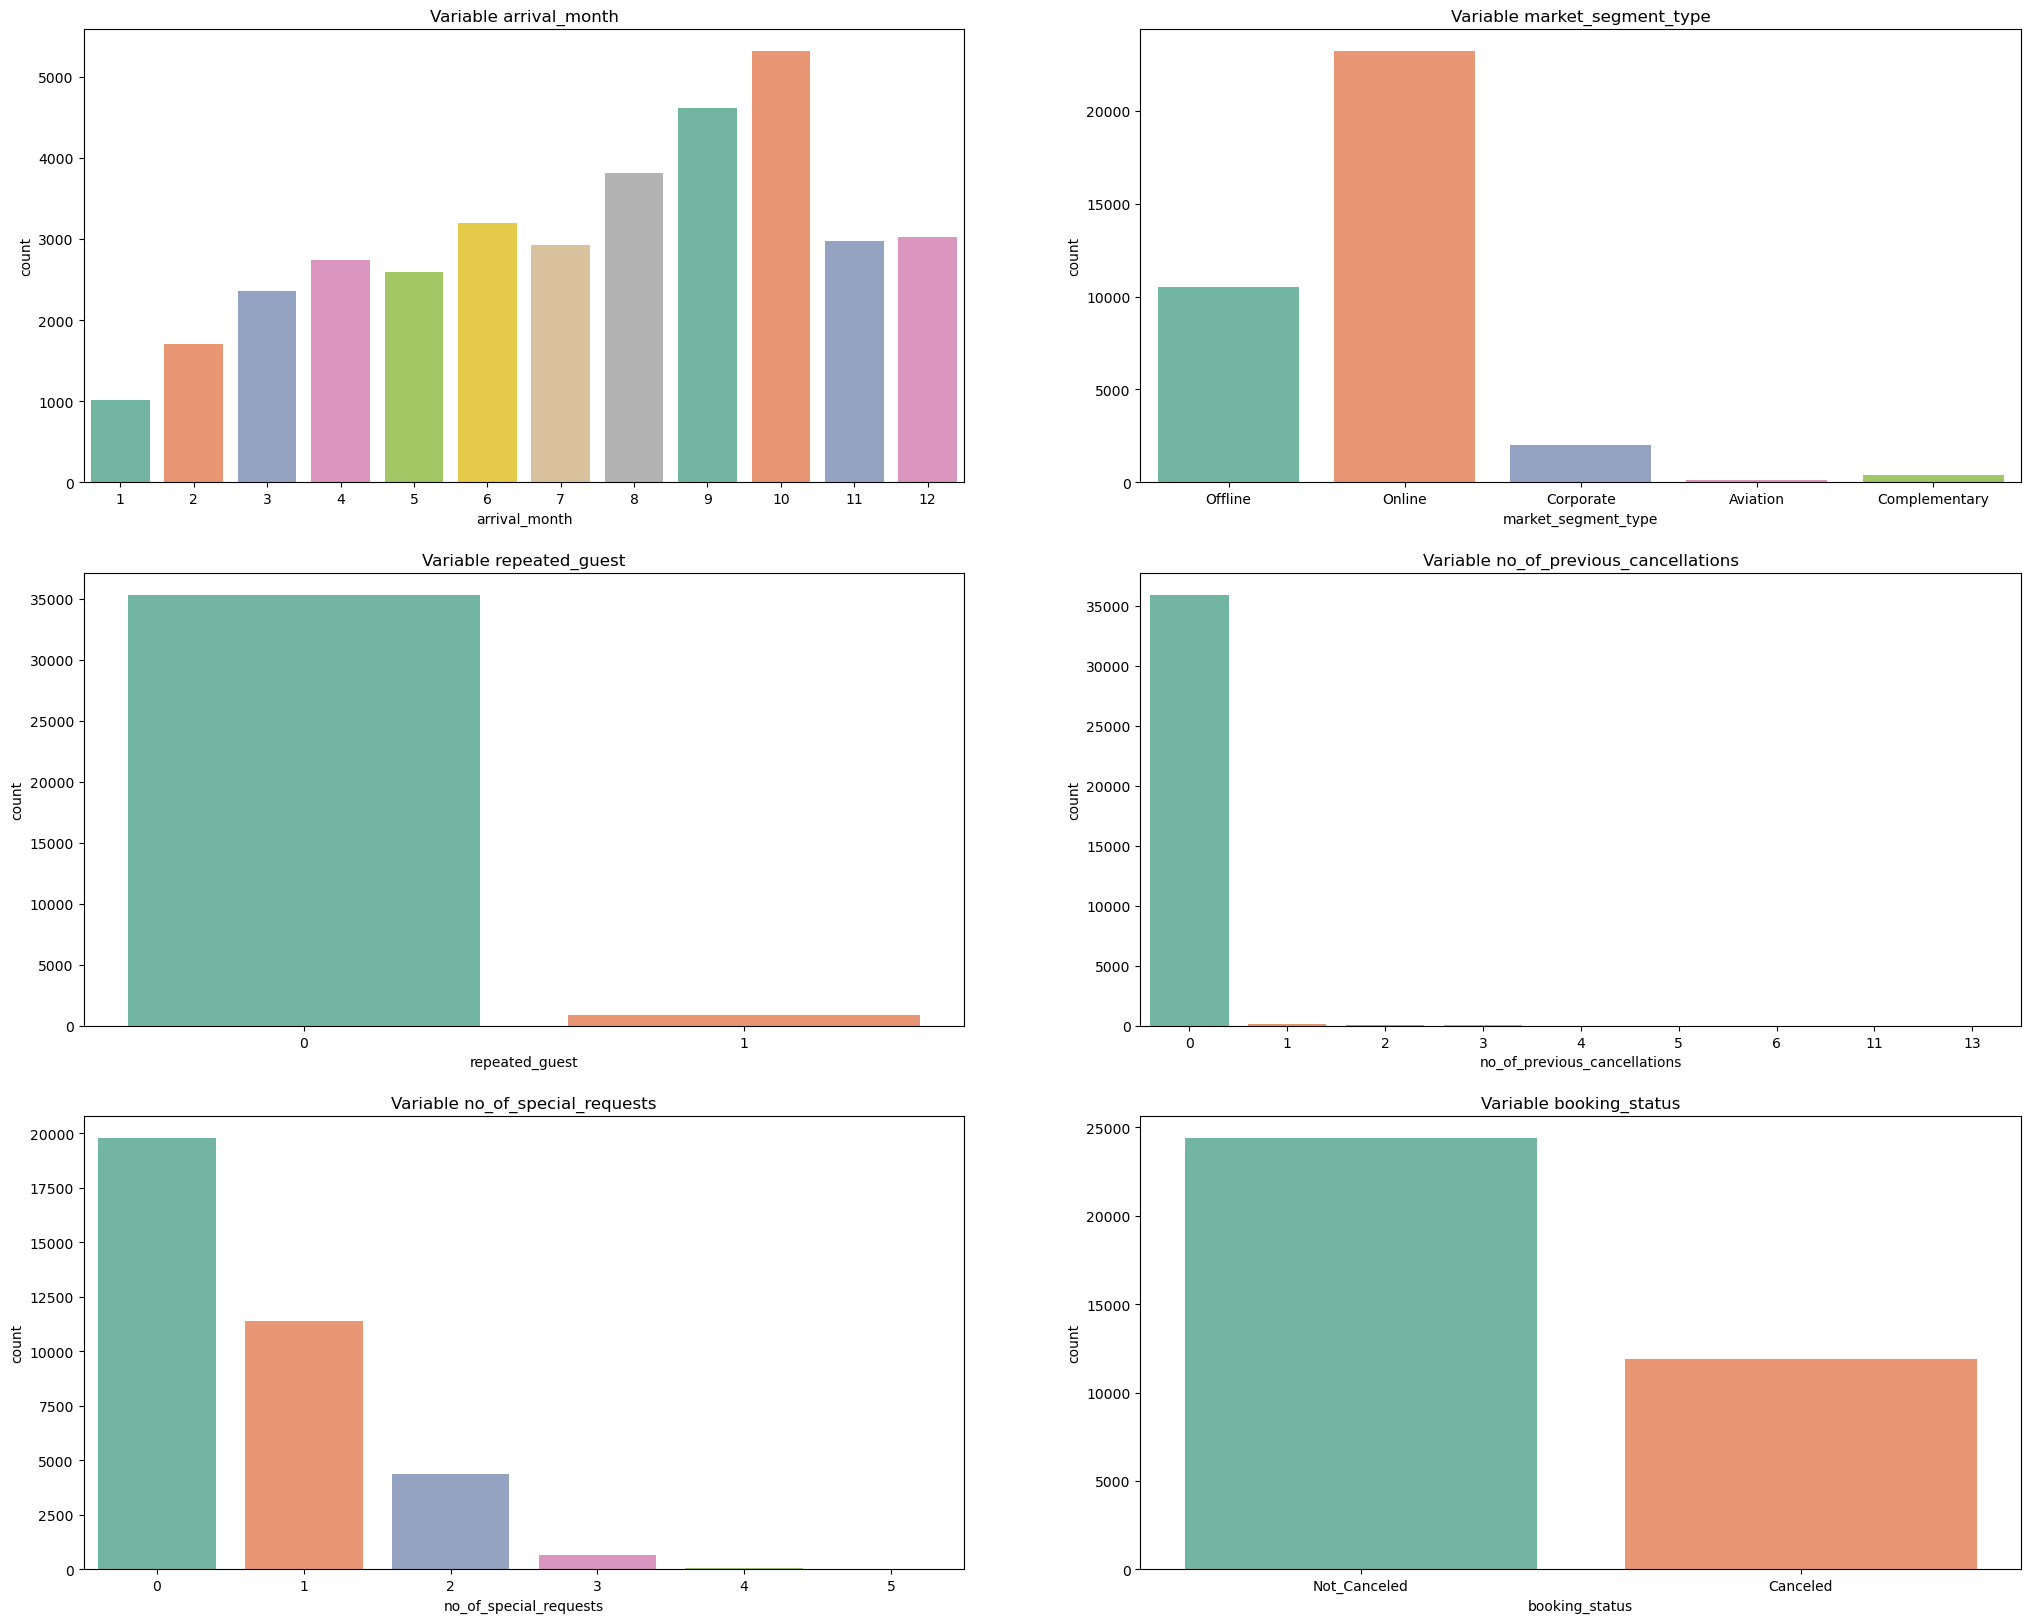

In [14]:
plt.figure(figsize = (25,20))
plt.subplot(3,2,1)
plt.gca().set_title('Variable arrival_month')
sns.countplot(x = 'arrival_month', palette = 'Set2', data = df)

plt.subplot(3,2,2)
plt.gca().set_title('Variable market_segment_type')
sns.countplot(x = 'market_segment_type', palette = 'Set2', data = df)

plt.subplot(3,2,3)
plt.gca().set_title('Variable repeated_guest')
sns.countplot(x = 'repeated_guest', palette = 'Set2', data = df)

plt.subplot(3,2,4)
plt.gca().set_title('Variable no_of_previous_cancellations')
sns.countplot(x = 'no_of_previous_cancellations', palette = 'Set2', data = df)

plt.subplot(3,2,5)
plt.gca().set_title('Variable no_of_special_requests')
sns.countplot(x = 'no_of_special_requests', palette = 'Set2', data = df)

plt.subplot(3,2,6)
plt.gca().set_title('Variable booking_status')
sns.countplot(x = 'booking_status', palette = 'Set2', data = df)


Da questi ultimi grafici si nota che: osservando le prenotazioni per MESE, possiamo notare che c'è un aumento graduale da gennaio a ottobre e poi di nuovo un calo  nei mesi di novembre e dicembre;
la maggior parte delle prenotazioni viene effettuata online;
la maggior parte degli ospiti è costituita da clienti che non sono mai stati in hotel (e di solito sono ospiti che NON hanno mai cancellato);
maggiore è il numero di richieste speciali, meno dati abbiamo.
Se si guarda la variabile TARGET, si può vedere che si ha circa il 65% di prenotazioni che NON sono state cancellate.


booking_status
Not_Canceled    24390
Canceled        11885
Name: count, dtype: int64


Text(0.5, 1.0, 'distribuzione delle classi \nclassi sbilanciate')

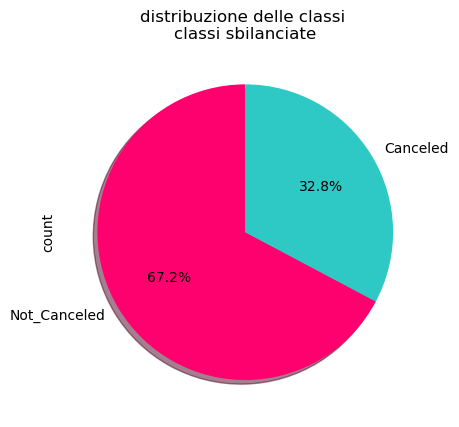

In [15]:
#In riferimento al TARGET, vediamo più in dettaglio la distribuzione delle prenotazioni cancellate e non cancellate.
#qua parte presa da baldi (cioè da "tesina.py")

# OSSERVIAMO LA LABEL 'TARGET'
# visualizzazione distribuzione delle due classi all'interno del dataset
target = data['booking_status'] #qui lascio "data" anziché "data2" per avere la label "Cancellato/Non cancellato" anziché "1/0" nel grafico
target_counts = target.value_counts(dropna=False)
print(target_counts)
target_counts.plot.pie(labels=target_counts.index.tolist(), colors = ['#FF006F', '#2EC9C5'], autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("distribuzione delle classi \nclassi sbilanciate")

In [16]:
# dataset molto sbilanciato! Ora voglio visualizzare in percentuale la distribuzione delle classi
class_cancelled_occurrence = sum(data['booking_status'] == 'Canceled')  # Totale delle occorrenze della classe "Cancelled"
class_not_cancelled_occurrence = sum(data['booking_status'] == 'Not_Canceled')  # Totale delle occorrenze della classe "Not Cancelled"
total_samples = len(data['booking_status'])  # Totale delle campioni nel dataset

print("\nBooking Cancellati: {:.2%}".format(class_cancelled_occurrence / total_samples))  # Percentuale dei booking cancellati
print("Booking Non Cancellati: {:.2%}".format(class_not_cancelled_occurrence / total_samples))  # Percentuale dei booking non cancellati



Booking Cancellati: 32.76%
Booking Non Cancellati: 67.24%


VARIABILI CONTINUE

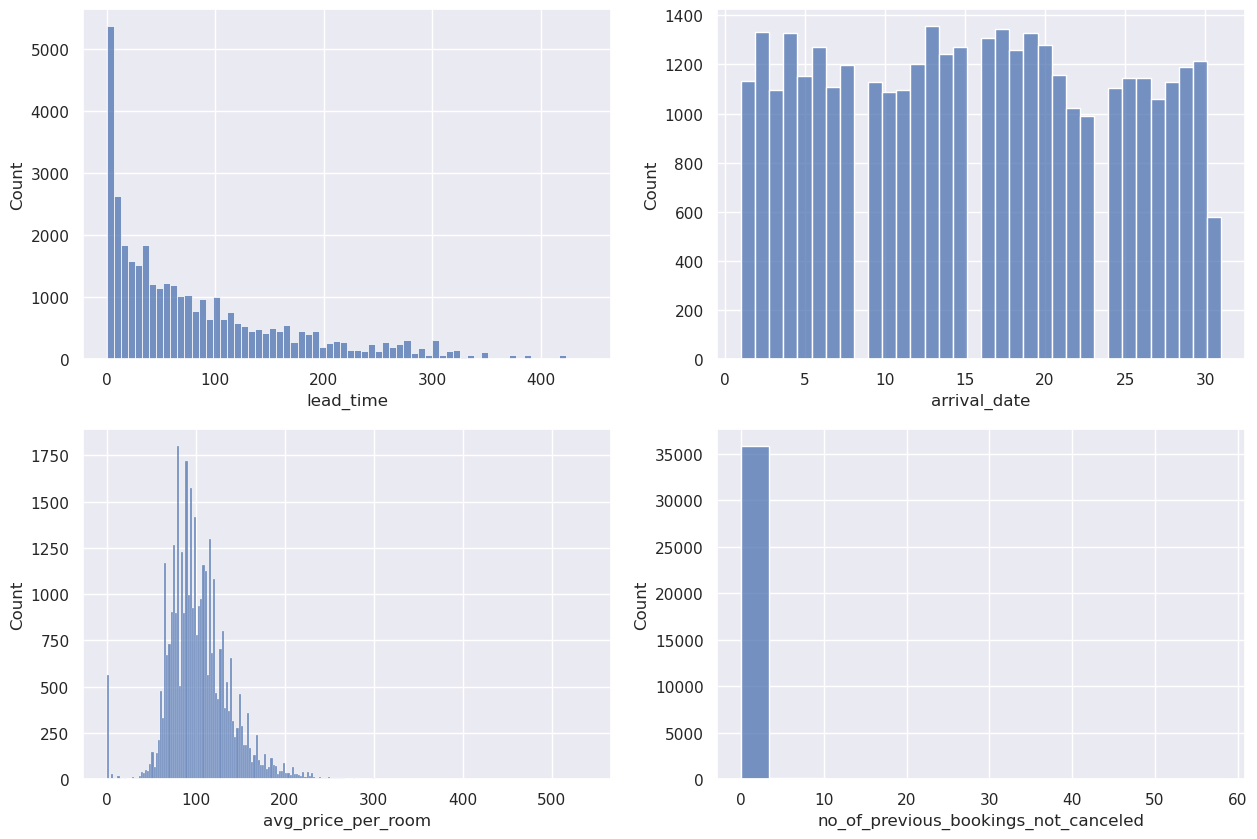

In [17]:
plt.figure(figsize = (15,10))

sns.set(color_codes = True)
plt.subplots_adjust(hspace=0.8)
plt.subplot(2,2,1)
sns.histplot(df['lead_time'], kde = False)

plt.subplot(2,2,2)
sns.histplot(df['arrival_date'], kde = False)

plt.subplot(2,2,3)
sns.histplot(df['avg_price_per_room'], kde = False)

plt.subplot(2,2,4)
sns.histplot(df['no_of_previous_bookings_not_canceled'], kde = False)
plt.subplots_adjust(hspace=0.2) 


Osservando le nostre variabili continue possiamo notare che generalmente le prenotazioni vengono effettuate senza impiegare troppo tempo: più tempo ci vuole, MINORE è il numero di prenotazioni.
Possiamo vedere che il top dei nostri dati è di solito sui 100 euro per il prezzo medio della camera e che gli ospiti di solito non hanno mai cancellato una prenotazione prima.
Notiamo che nel caso di "lead_time" e "avg_price_per_room" abbiamo una distribuzione un po'sbilanciata.

<Axes: title={'center': 'Boxplot lead_time'}, xlabel='lead_time'>

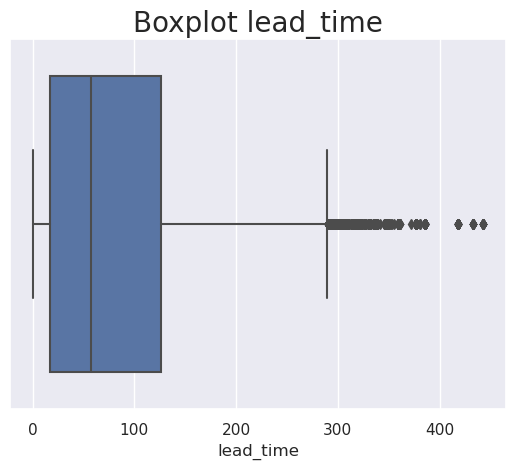

In [18]:
#Quindi vediamo ora nello specifico le due variabili "lead_time" e "avg_price_per_room" per vedere se ci sono OUTLIER.
plt.title("Boxplot lead_time", fontdict = {'fontsize': 20})
sns.boxplot(x=df["lead_time"])


<Axes: title={'center': 'Boxplot avg_price_per_room'}, xlabel='avg_price_per_room'>

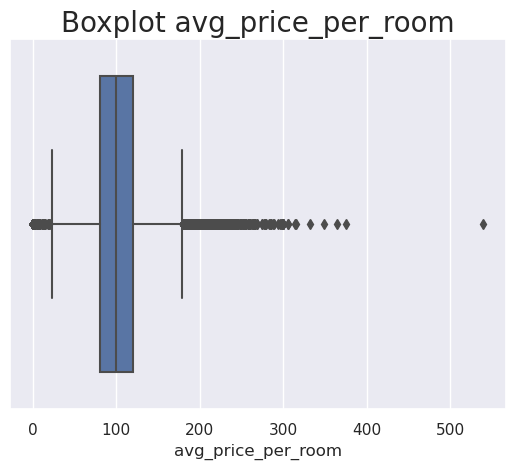

In [19]:
plt.title("Boxplot avg_price_per_room", fontdict = {'fontsize': 20})
sns.boxplot(x=df["avg_price_per_room"])

ANALISI BIVARIATA

<Axes: xlabel='booking_status', ylabel='count'>

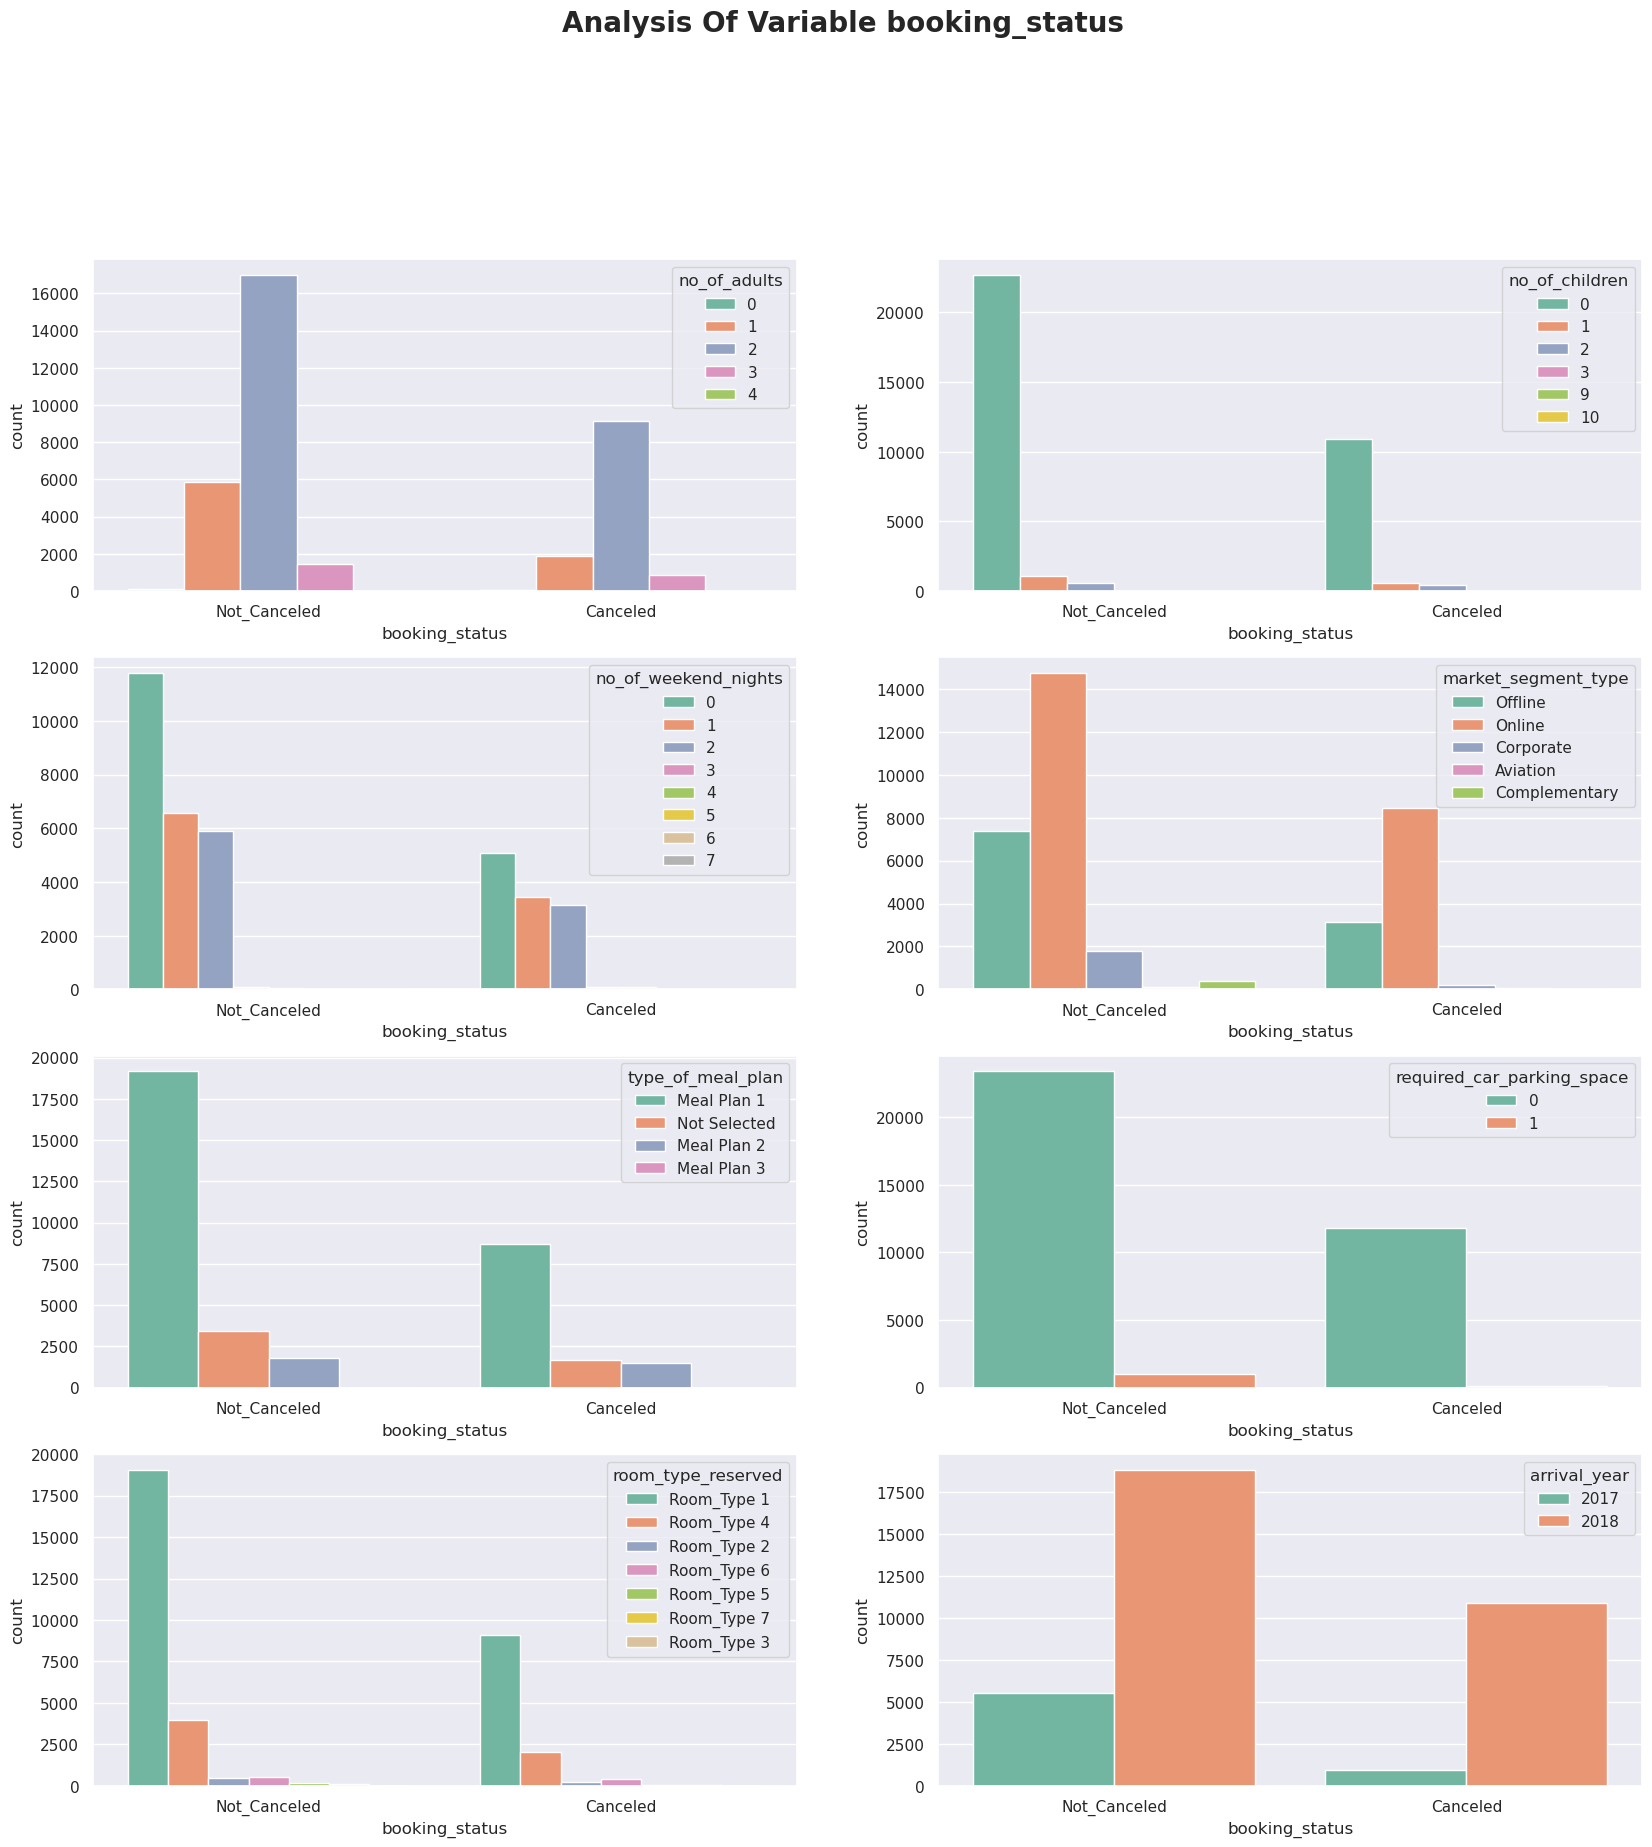

In [20]:
plt.figure(figsize = (20, 25))
plt.suptitle("Analysis Of Variable booking_status",fontweight="bold", fontsize=20)

plt.subplot(5,2,1)
sns.countplot(x = 'booking_status', hue = 'no_of_adults', palette = 'Set2', data = df)

plt.subplot(5,2,2)
sns.countplot(x = 'booking_status', hue = 'no_of_children', palette = 'Set2', data = df)

plt.subplot(5,2,3)
sns.countplot(x = 'booking_status', hue = 'no_of_weekend_nights', palette = 'Set2', data = df)

plt.subplot(5,2,4)
sns.countplot(x = 'booking_status', hue = 'market_segment_type', palette = 'Set2', data = df)

plt.subplot(5,2,5)
sns.countplot(x = 'booking_status', hue = 'type_of_meal_plan', palette = 'Set2', data = df)

plt.subplot(5,2,6)
sns.countplot(x = 'booking_status', hue = 'required_car_parking_space', palette = 'Set2', data = df)

plt.subplot(5,2,7)
sns.countplot(x = 'booking_status', hue = 'room_type_reserved', palette = 'Set2', data = df)

plt.subplot(5,2,8)
sns.countplot(x = 'booking_status', hue = 'arrival_year', palette = 'Set2', data = df)

Osservando la variabile target, possiamo avere delle intuizioni, ovvero generalmente NON cancellano la prenotazione:
    1) gli ospiti che richiedono un posto auto,
    2) gli ospiti che hanno soggiornato in precedenza;
    3) gli ospiti che fanno richieste speciali sono ospiti meno propensi a cancellare--> più richieste sono fatte.
La distorsione più grande che si vede qui è la variabile "Lead_Time": più tempo la persona impiega a prenotare la camera, più è probabile che cancelli, il che ha molto senso;
un altro aspetto interessante è che negli ultimi 3 mesi dell'anno ci sono di solito meno cancellazioni.
Inoltre, nonostante sia una leggera pendenza, si può vedere che le camere più costose possono anche subire più cancellazioni

<Axes: xlabel='avg_price_per_room', ylabel='Density'>

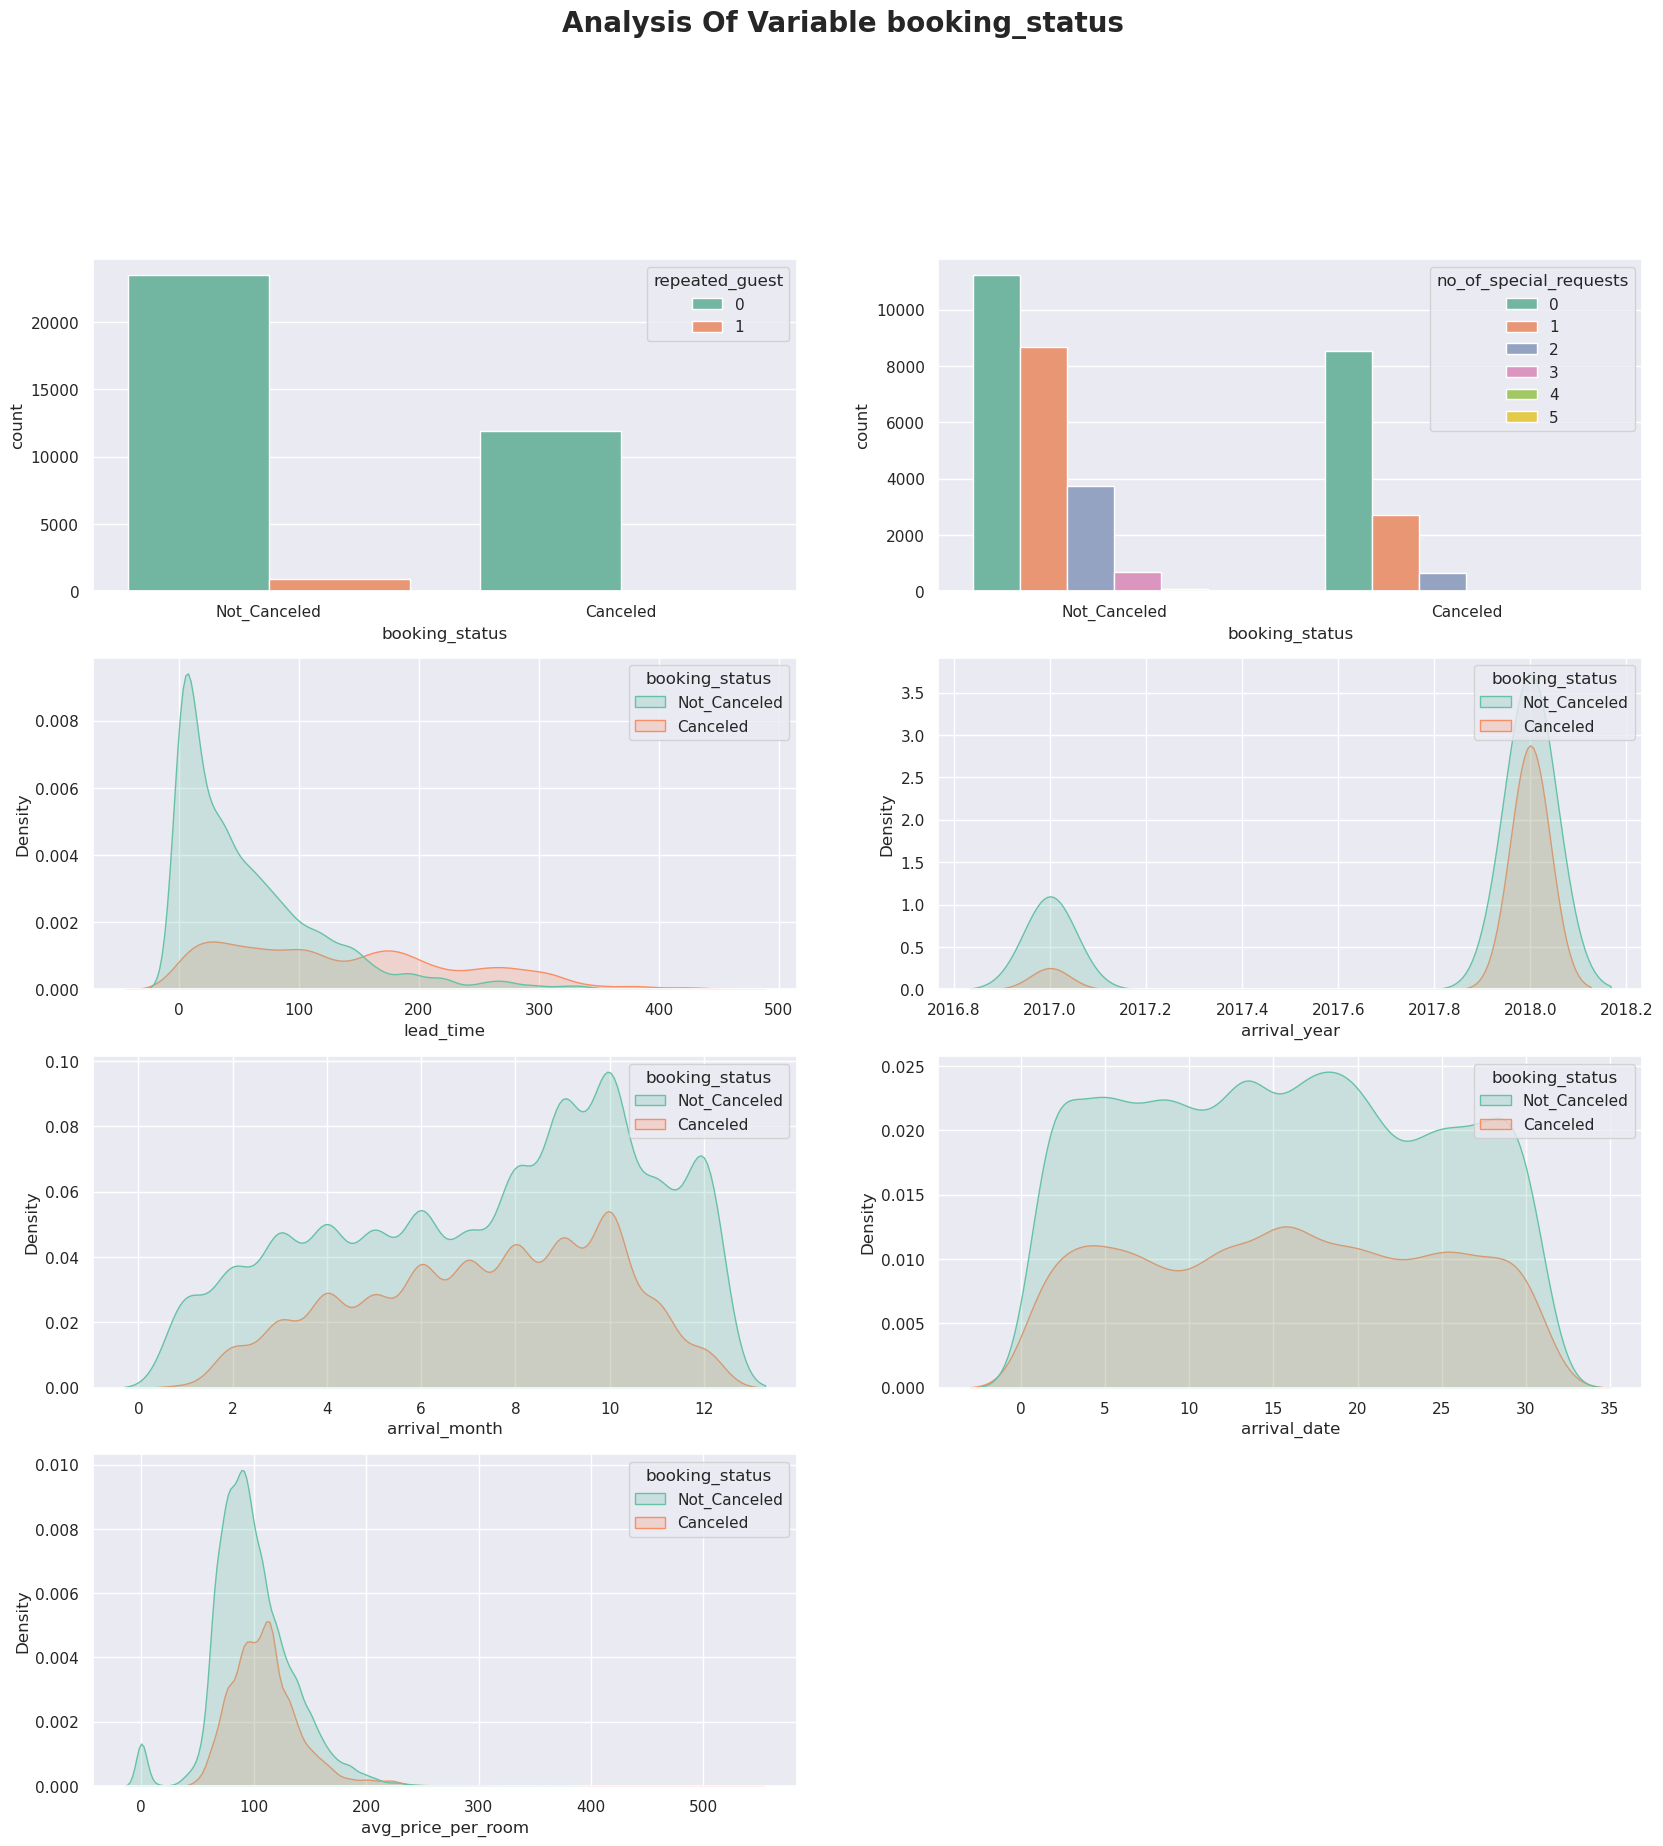

In [21]:
plt.figure(figsize = (20, 25))

plt.suptitle("Analysis Of Variable booking_status",fontweight="bold", fontsize=20)

plt.subplot(5,2,1)
sns.countplot(x = 'booking_status', hue = 'repeated_guest', palette = 'Set2', data = df)

plt.subplot(5,2,2)
sns.countplot(x = 'booking_status', hue = 'no_of_special_requests', palette = 'Set2', data = df)

plt.subplot(5,2,3)
sns.kdeplot(x='lead_time', hue='booking_status', palette = 'Set2', fill=True, data=df)

plt.subplot(5,2,4)
sns.kdeplot(x='arrival_year', hue='booking_status', palette = 'Set2', fill=True, data=df)

plt.subplot(5,2,5)
sns.kdeplot(x='arrival_month', hue='booking_status', palette = 'Set2', fill=True, data=df)

plt.subplot(5,2,6)
sns.kdeplot(x='arrival_date', hue='booking_status', palette = 'Set2', fill=True, data=df)

plt.subplot(5,2,7)
sns.kdeplot(x='avg_price_per_room', hue='booking_status', palette = 'Set2', fill=True, data=df)




Ora, come abbiamo visto in precedenza, la variabile Lead_Time era quella che presentava una maggiore differenziazione
tra cancellati e non cancellati, quindi diamo un'occhiata più approfondita, possiamo vedere che generalmente chi richiede
un posto auto ha un lead time più breve, vediamo la stessa cosa con i clienti che hanno già soggiornato in hotel,
quando guardiamo le altre variabili ne abbiamo alcune che richiamano la nostra attenzione,
la variabile no_weekend_nights di solito chi soggiorna 3 o 4 notti ha un lead_time più lungo,
quando guardiamo anche il segmento, gli ospiti per motivi "speciali" di solito non hanno un lead time elevato,
quando guardiamo meal_plan, gli ospiti che utilizzano meal_plan2 di solito hanno un lead time molto alto,
quando guardiamo il tipo di camera vediamo che abbiamo alcune camere che vengono selezionate più velocemente di altre e
quando guardiamo le richieste speciali, anche se ci vuole, più richieste, il lead time scende

MODEL BUILDING

In [22]:
data2 = data.copy() #per non modificare il dataset originale, lavorerò su una copia "data2"

In [23]:

#Drop customer IDs
data3= data2.iloc[:,1:]
#Convert booking_status to numeric: così rimpiazzo i valori Yes e No con 1 e 0 (it says if the booking was canceled or not)
data3['booking_status'].replace(to_replace='Canceled', value=1, inplace=True)
data3['booking_status'].replace(to_replace='Not_Canceled',  value=0, inplace=True)

print(data3.head(10),"\n") #per visualizzare il fatto che il bookID è stato rimosso e che i valori Yes e No sono stati convertiti in 1 e 0




   no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   
5             2               0                     0                  2   
6             2               0                     1                  3   
7             2               0                     1                  3   
8             3               0                     0                  4   
9             2               0                     0                  5   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1        224   
1

In [24]:
#TODO: gestione delle feature categoriche
#Sarà necessario convertire le feature categoriche in numeriche, in modo da poterle utilizzare per l'addestramento del modello.
#Per fare ciò, userò la tecnica di "One-Hot Encoding", che consiste nel creare una nuova colonna per ogni valore unico della feature categorica.
#Per esempio, la feature "room_type_reserved" ha 7 valori unici, dunque verranno create 7 nuove colonne, una per ogni valore unico della feature.
#Per ogni campione, la colonna corrispondente al valore unico della feature avrà valore 1, mentre tutte le altre colonne avranno valore 0.
#In questo modo, la feature categorica viene convertita in numerica, e il modello potrà utilizzarla per l'addestramento.
print("Dimensione dataset prima di applicare il One-Hot Encoding: ", data3.shape) 
#per visualizzare la dimensione del dataset prima di applicare il One-Hot Encoding
data3_dummies = pd.get_dummies(data3, drop_first=True) #Qui dummizza le feature categoriche. Dove "drop_first=True" serve a togliere una colonna per ogni feature categorica, in modo da evitare la multi-collinearità
print("Dimensione dataset dopo aver applicato il One-Hot Encoding: ", data3_dummies.shape) #per visualizzare la nuova dimensione del dataset
data3_dummies.head(10) #per visualizzare il fatto che le feature categoriche sono state convertite in numeriche


Dimensione dataset prima di applicare il One-Hot Encoding:  (36275, 18)
Dimensione dataset dopo aver applicato il One-Hot Encoding:  (36275, 28)


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1,2,0,224,2017,10,2,0,...,False,False,False,False,False,False,False,False,True,False
1,2,0,2,3,0,5,2018,11,6,0,...,False,False,False,False,False,False,False,False,False,True
2,1,0,2,1,0,1,2018,2,28,0,...,False,False,False,False,False,False,False,False,False,True
3,2,0,0,2,0,211,2018,5,20,0,...,False,False,False,False,False,False,False,False,False,True
4,2,0,1,1,0,48,2018,4,11,0,...,False,False,False,False,False,False,False,False,False,True
5,2,0,0,2,0,346,2018,9,13,0,...,False,False,False,False,False,False,False,False,False,True
6,2,0,1,3,0,34,2017,10,15,0,...,False,False,False,False,False,False,False,False,False,True
7,2,0,1,3,0,83,2018,12,26,0,...,False,False,True,False,False,False,False,False,False,True
8,3,0,0,4,0,121,2018,7,6,0,...,False,False,False,False,False,False,False,False,True,False
9,2,0,0,5,0,44,2018,10,18,0,...,False,False,True,False,False,False,False,False,False,True


In [25]:
#by BALDI: post dummizzazione controllo il tipo delle variabili per vedere se sono tutte numeriche (boolenae o intere o flat)
print(data3_dummies.dtypes)
plt.show()

no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
required_car_parking_space                int64
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                            int64
type_of_meal_plan_Meal Plan 2              bool
type_of_meal_plan_Meal Plan 3              bool
type_of_meal_plan_Not Selected             bool
room_type_reserved_Room_Type 2             bool
room_type_reserved_Room_Type 3             bool
room_type_reserved_Room_Type 4          

Text(0.5, 1.0, "correlazione delle feature \n con il target 'booking_status'")

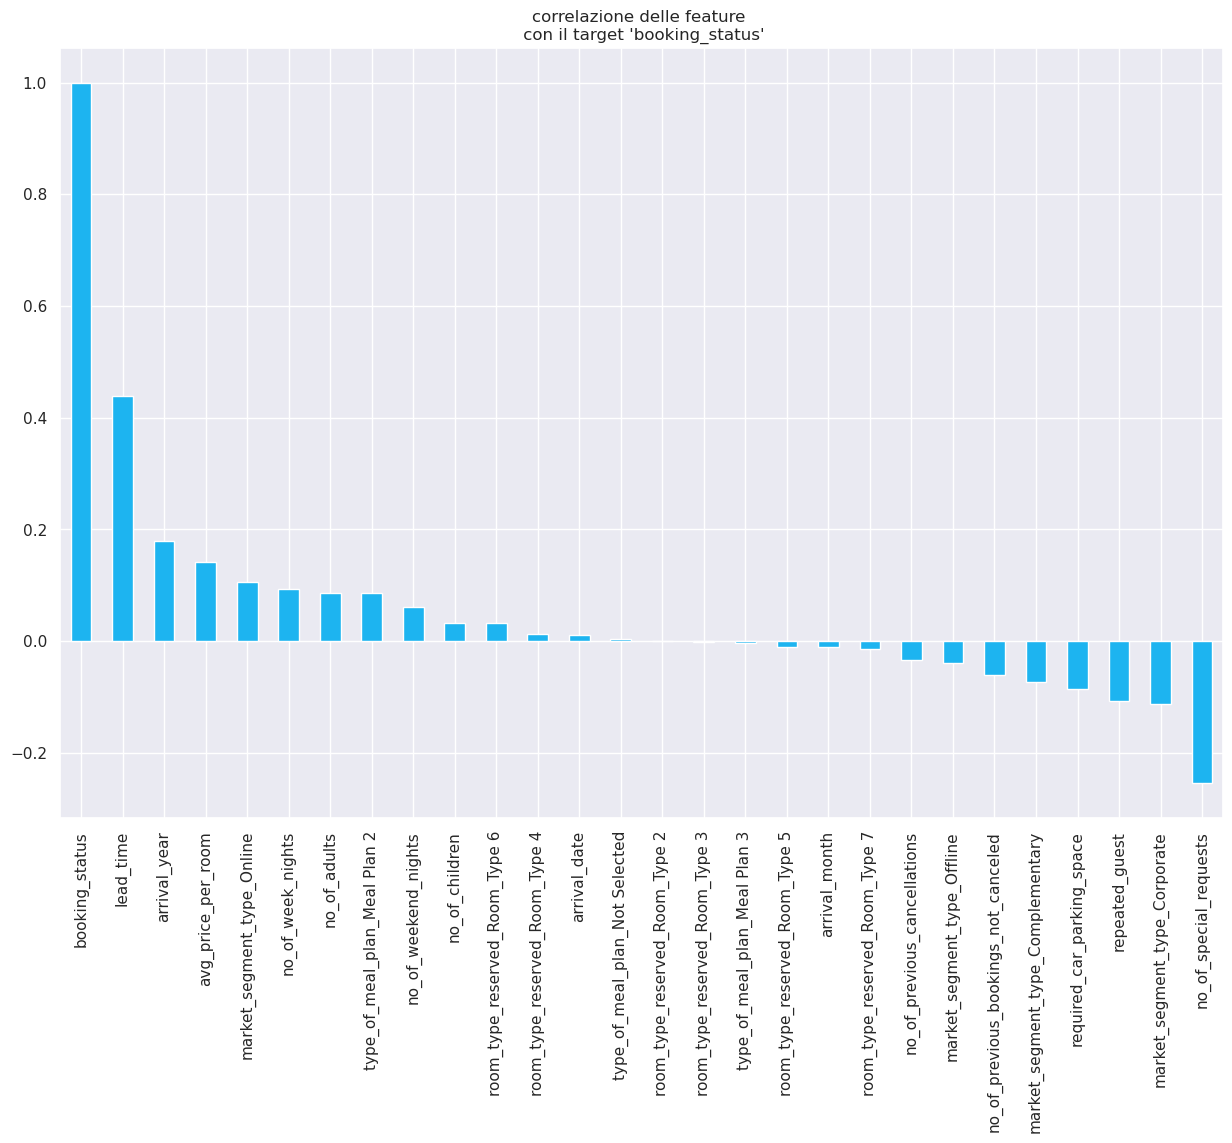

In [26]:
#N.B. Questo prossimo plot va fatto SOLO una volta che si è convertita la label "booking_status" in 1 e 0, altrimenti non si può perché necessita di valori numerici!
#Ora che si è vista la distribuzione della label "booking_status", si potrebbe voler vedere la distribuzione delle altre feature rispetto alla label.
plt.figure(figsize=(15, 10))
data3_dummies.corr()['booking_status'].sort_values(ascending = False).plot(kind='bar', color= hist_color) #qui plotta la correlazione tra le feature e il target "booking_status", SUPER UTILE: #Con questo grafico vedo quali feature hanno 0 corr con l'uscita per capire quali mi servono!#Usa un bar plot che è come se fosse UNA SOLA RIGA della correlation matrix che mi paragona con tutte le altre--> infatti con sé stesso un valore ha max correlazione!
plt.title("correlazione delle feature \n con il target 'booking_status'")

In [27]:
#ora dropperò le feature che vedo avere bassa correlazione con target
data3_dummies.columns.tolist() #mi serve per prendere i nomi delle feature da buttare via


['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'required_car_parking_space',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'arrival_date',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests',
 'booking_status',
 'type_of_meal_plan_Meal Plan 2',
 'type_of_meal_plan_Meal Plan 3',
 'type_of_meal_plan_Not Selected',
 'room_type_reserved_Room_Type 2',
 'room_type_reserved_Room_Type 3',
 'room_type_reserved_Room_Type 4',
 'room_type_reserved_Room_Type 5',
 'room_type_reserved_Room_Type 6',
 'room_type_reserved_Room_Type 7',
 'market_segment_type_Complementary',
 'market_segment_type_Corporate',
 'market_segment_type_Offline',
 'market_segment_type_Online']

In [28]:
#Rimuovo le feature che hanno bassa correlazione con il target "booking_status"

# Rimuovi la feature 'type_of_meal_plan_Not Selected'
data3_dummies.drop(columns='type_of_meal_plan_Not Selected', axis=1, inplace=True)

# Rimuovi la feature 'room_type_reserved_Room_Type 3'
data3_dummies.drop(columns='room_type_reserved_Room_Type 3', axis=1, inplace=True)

# Rimuovi la feature 'room_type_reserved_Room_Type 2'
data3_dummies.drop(columns='room_type_reserved_Room_Type 2', axis=1, inplace=True)

# Rimuovi la feature 'room_type_reserved_Room_Type 2'
data3_dummies.drop(columns='type_of_meal_plan_Meal Plan 3', axis=1, inplace=True)


# Verifica che le feature siano state rimosse
print("Lista delle colonne rimaste nel dataframe:" , data3_dummies.columns.tolist())



Lista delle colonne rimaste nel dataframe: ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'booking_status', 'type_of_meal_plan_Meal Plan 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Complementary', 'market_segment_type_Corporate', 'market_segment_type_Offline', 'market_segment_type_Online']


In [29]:
#Feature che non sei sicura vadano droppate (ma hanno bassa correlazione con la label)
data3_dummies.drop(columns='arrival_date', axis=1, inplace=True)
data3_dummies.drop(columns='arrival_month', axis=1, inplace=True)

# Verifica che le feature siano state rimosse
print("Lista delle colonne rimaste nel dataframe:" , data3_dummies.columns.tolist())

Lista delle colonne rimaste nel dataframe: ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'booking_status', 'type_of_meal_plan_Meal Plan 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Complementary', 'market_segment_type_Corporate', 'market_segment_type_Offline', 'market_segment_type_Online']


Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'booking_status',
       'type_of_meal_plan_Meal Plan 2', 'room_type_reserved_Room_Type 4',
       'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6',
       'room_type_reserved_Room_Type 7', 'market_segment_type_Complementary',
       'market_segment_type_Corporate', 'market_segment_type_Offline',
       'market_segment_type_Online'],
      dtype='object')


Text(0.5, 1.0, "correlazione delle feature \n con il target 'booking_status'")

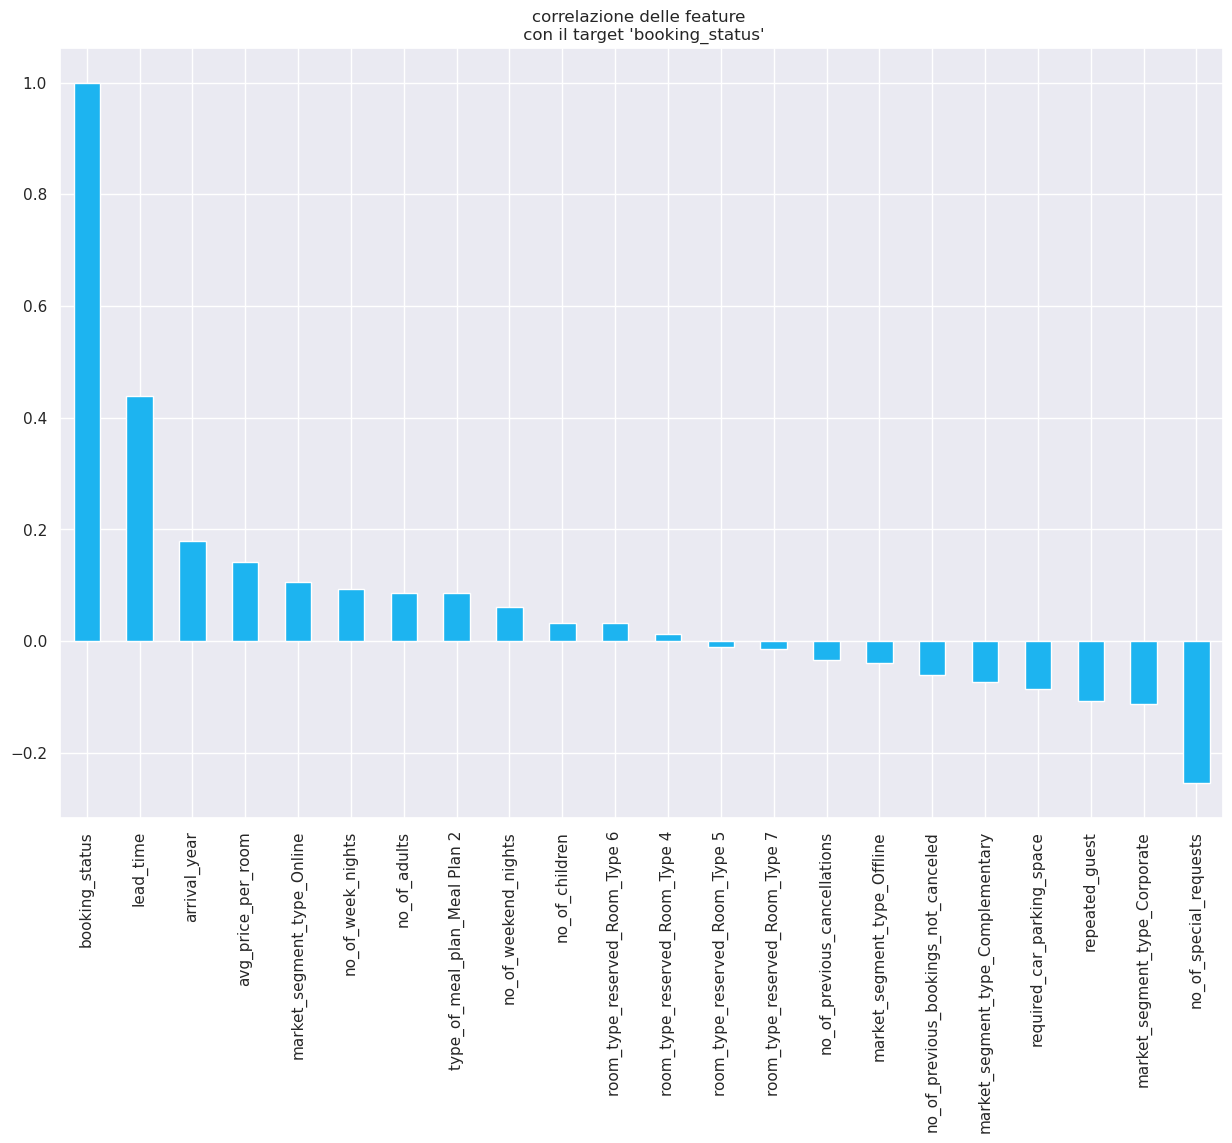

In [30]:
print(data3_dummies.columns)
plt.figure(figsize=(15, 10))
data3_dummies.corr()['booking_status'].sort_values(ascending = False).plot(kind='bar', color= hist_color) #qui plotta la correlazione tra le feature e il target "booking_status", SUPER UTILE: #Con questo grafico vedo quali feature hanno 0 corr con l'uscita per capire quali mi servono!#Usa un bar plot che è come se fosse UNA SOLA RIGA della correlation matrix che mi paragona con tutte le altre--> infatti con sé stesso un valore ha max correlazione!
plt.title("correlazione delle feature \n con il target 'booking_status'")

<Axes: title={'center': 'correlazione features Dataset'}>

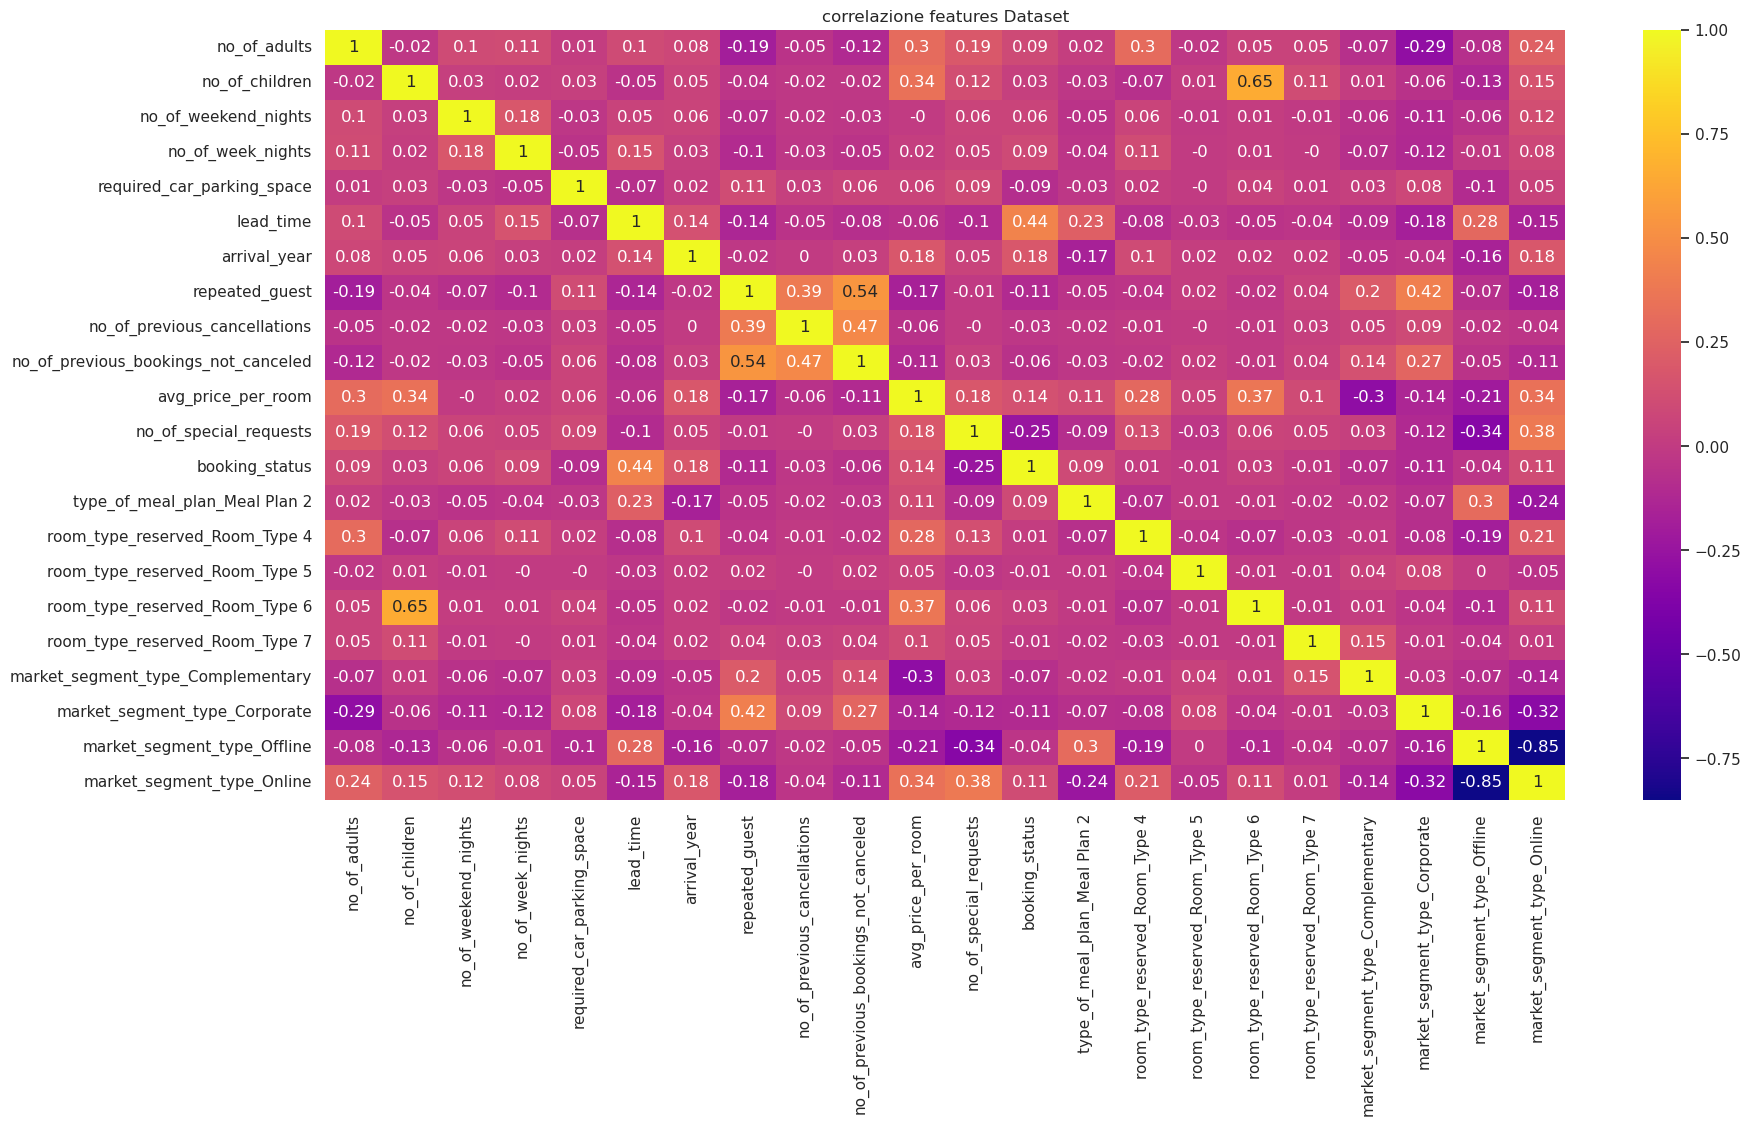

In [31]:
#Vediamo la Correlation matrix per vedere se ci sono feature che sono correlate tra loro e quindi potrebbero essere eliminate
#TODO: qua parte presa da churn.py!
#data.dropna(inplace = True)#Remove missing values --->QUESTA PARTE NON SERVE PERCHE' NON CI SONO VALORI NULLI NEL DATASET
plt.figure(figsize = (20, 10))
plt.title("correlazione features Dataset")
corr_matrix = data3_dummies.corr().round(2)  #la Correlation matrix può essere calcolata SOLO su feature numeriche! Dove "round(2)" serve a arrotondare a 2 cifre decimali
sns.heatmap(corr_matrix, annot=True, cmap = 'plasma')

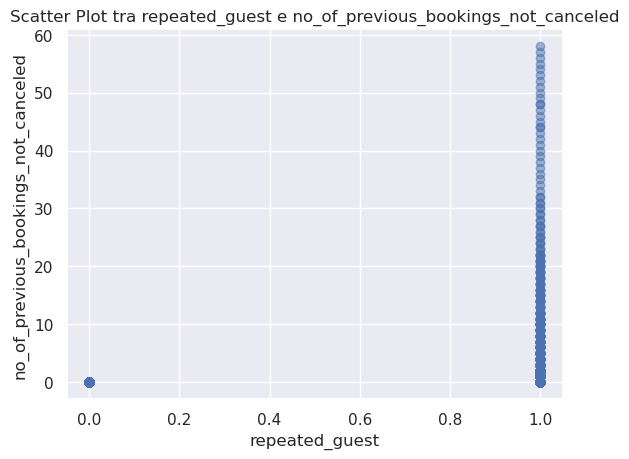

In [32]:
# Creare uno scatter plot per visualizzare il rapporto tra le feature che vedo avere la più alta correlazione
plt.scatter(data['repeated_guest'], data['no_of_previous_bookings_not_canceled'], alpha=0.5)

# Aggiungere etichette agli assi
plt.xlabel('repeated_guest')
plt.ylabel('no_of_previous_bookings_not_canceled')

# Aggiungere un titolo al grafico
plt.title('Scatter Plot tra repeated_guest e no_of_previous_bookings_not_canceled')

# Mostrare il grafico
plt.show()


#### ADDESTRAMENTO

In [33]:
#Dato che ho un dataset sbilanciato (come visto nel grafico a torta della label) devo fare il resampling con tecnica SMOTE
from imblearn.over_sampling import SMOTE
print("dimensione dataset prima del resampling: ", data3_dummies.shape)
print("dimensione target prima del resampling: ",target.shape)
oversample = SMOTE(random_state=2)
data_sampled, target = oversample.fit_resample(data3_dummies, target)
print("dimensione dataset dopo il resampling: ",data_sampled.shape)
print("dimensione target dopo il resampling: ",target.shape)

dimensione dataset prima del resampling:  (36275, 22)
dimensione target prima del resampling:  (36275,)
dimensione dataset dopo il resampling:  (48780, 22)
dimensione target dopo il resampling:  (48780,)


booking_status
Not_Canceled    24390
Canceled        11885
Name: count, dtype: int64


(36275,)

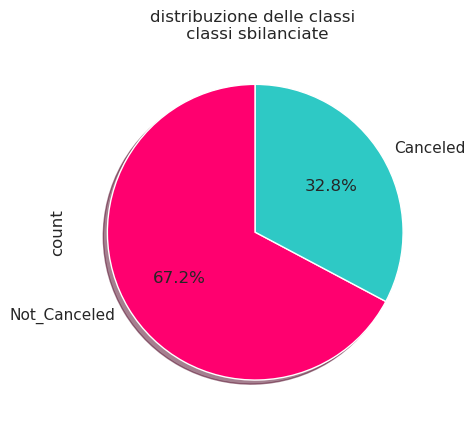

In [34]:
#Vediamo la differenza della distribuzione della label pre e post resampling con i pie chart:
#Per il "pre" riprendo quello già visto:
target = data['booking_status'] #qui lascio "data" anziché "data2" per avere la label "Cancellato/Non cancellato" anziché "1/0" nel grafico
target_counts = target.value_counts(dropna=False)
print(target_counts)
target_counts.plot.pie(labels=target_counts.index.tolist(), colors = ['#FF006F', '#2EC9C5'], autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("distribuzione delle classi \n classi sbilanciate")
target.shape

booking_status
0    24390
1    24390
Name: count, dtype: int64


Text(0.5, 1.0, 'distribuzione delle classi \n classi bilanciate')

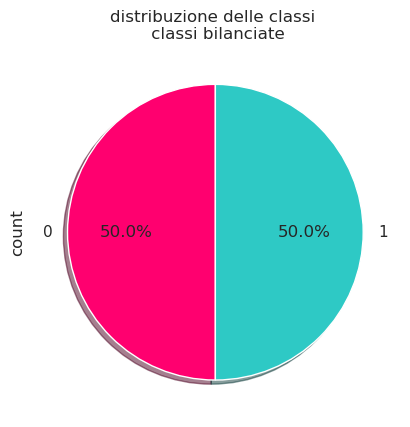

In [35]:
target = data_sampled['booking_status'] #qui lascio "data" anziché "data2" per avere la label "Cancellato/Non cancellato" anziché "1/0" nel grafico
target_counts = target.value_counts(dropna=False)
print(target_counts)
target_counts.plot.pie(labels=target_counts.index.tolist(), colors = ['#FF006F', '#2EC9C5'], autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("distribuzione delle classi \n classi bilanciate")


In [36]:
# BY BALDI:
#rimozione della label "booking_status"
target = data_sampled['booking_status']
data_sampled.drop(columns='booking_status',axis=1,inplace=True)
print(data_sampled.shape)
print(data_sampled.columns)

(48780, 21)
Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2',
       'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5',
       'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7',
       'market_segment_type_Complementary', 'market_segment_type_Corporate',
       'market_segment_type_Offline', 'market_segment_type_Online'],
      dtype='object')


In [37]:
data_sampled.head(10)


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,...,no_of_special_requests,type_of_meal_plan_Meal Plan 2,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1,2,0,224,2017,0,0,0,...,0,False,False,False,False,False,False,False,True,False
1,2,0,2,3,0,5,2018,0,0,0,...,1,False,False,False,False,False,False,False,False,True
2,1,0,2,1,0,1,2018,0,0,0,...,0,False,False,False,False,False,False,False,False,True
3,2,0,0,2,0,211,2018,0,0,0,...,0,False,False,False,False,False,False,False,False,True
4,2,0,1,1,0,48,2018,0,0,0,...,0,False,False,False,False,False,False,False,False,True
5,2,0,0,2,0,346,2018,0,0,0,...,1,True,False,False,False,False,False,False,False,True
6,2,0,1,3,0,34,2017,0,0,0,...,1,False,False,False,False,False,False,False,False,True
7,2,0,1,3,0,83,2018,0,0,0,...,1,False,True,False,False,False,False,False,False,True
8,3,0,0,4,0,121,2018,0,0,0,...,1,False,False,False,False,False,False,False,True,False
9,2,0,0,5,0,44,2018,0,0,0,...,3,False,True,False,False,False,False,False,False,True


In [38]:
from sklearn.model_selection import train_test_split
#split training e test set
X_train,X_test,Y_train,Y_test = train_test_split(data_sampled,target,test_size=0.20,random_state=42,shuffle=True)


In [39]:
m,p = X_train.shape
# feature dummy
X_train = np.concatenate((np.ones((m,1)), X_train), axis=1)

In [40]:
mt,pt = X_test.shape
# feature dummy
X_test = np.concatenate((np.ones((mt,1)),X_test),axis=1)

In [41]:
## standardizziamo le features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train =sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [42]:
#modelli da provare (by baldi)
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.base import BaseEstimator
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import  Pipeline

In [43]:
# per poter avere una pipeline
class DummyEstimator(BaseEstimator):
    def fit(self): pass

    def score(self): pass

# Create a pipeline
pipe = Pipeline([('clf', DummyEstimator())])  # Placeholder Estimator

#Era di Baldi:
# search_space = [{'clf': [LogisticRegression()],
#                  'clf__penalty': ['l2','none'],
#                  'clf__C': np.logspace(0, 5, 20)},
#                 {'clf': [MLPClassifier(max_iter=1000)],
#                  'clf__hidden_layer_sizes':[(50,), (100,),(50,50),(100, 100)],
#                 'clf__alpha':[0.0001, 0.001,0.01, 0.1, 1,10,100],
#                 'clf__solver':['sgd','adam'],
#                 'clf__activation':['tanh','relu']}
#                 # NON HO POTUTO PROVARE SVC IN QUANTO TROPPO "LENTO" NEL FITTING, il mio pc si "rifiutava"
#                 # {
#                 #  'clf': [svm.SVC()],
#                 #  'clf__C': [0.001,0.01,0.1,1,10,30],
#                 #  'clf__kernel': ['linear','rbf','poly'],
#                 #  'clf__gamma': [0.01, 0.1, 1, 10, 100],
#                 #  'clf__degree': [3, 5, 7]
#                 #  }
#                 ]

search_space = [
    {
        'clf': [LogisticRegression()],
        'clf__penalty': ['l2', 'none'],
        'clf__C': np.logspace(0, 5, 20),
    },
    {
        'clf': [MLPClassifier(max_iter=1000)],
        'clf__hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
        'clf__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
        'clf__solver': ['sgd', 'adam'],
        'clf__activation': ['tanh', 'relu']
    },
    {
        'clf': [KNeighborsClassifier()],
        'clf__n_neighbors': [3, 5, 7, 9],
        'clf__weights': ['uniform', 'distance'],
        'clf__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    },
    {
        'clf': [SVC()],
        'clf__C': [0.001, 0.01, 0.1, 1, 10],
        'clf__kernel': ['linear', 'rbf', 'poly'],
        'clf__gamma': [0.01, 0.1, 1, 10],
        # 'clf__degree': [3, 5, 7]
    }
]


In [44]:
# Create grid search CV
model = GridSearchCV(pipe, search_space,n_jobs=-1,verbose=10,scoring='f1',cv=5)
model.fit(X_train,Y_train)

print("migliori parametri risultanti: ",model.best_params_)

# verifica bontà dell'algoritmo
Y_pred_train = model.predict(X_train)
Y_pred = model.predict(X_test)

Fitting 5 folds for each of 244 candidates, totalling 1220 fits
[CV 3/5; 1/244] START clf=LogisticRegression(), clf__C=1.0, clf__penalty=l2.....
[CV 1/5; 1/244] START clf=LogisticRegression(), clf__C=1.0, clf__penalty=l2.....
[CV 2/5; 2/244] START clf=LogisticRegression(), clf__C=1.0, clf__penalty=none...
[CV 4/5; 1/244] START clf=LogisticRegression(), clf__C=1.0, clf__penalty=l2.....
[CV 1/5; 2/244] START clf=LogisticRegression(), clf__C=1.0, clf__penalty=none...
[CV 5/5; 1/244] START clf=LogisticRegression(), clf__C=1.0, clf__penalty=l2.....
[CV 2/5; 1/244] START clf=LogisticRegression(), clf__C=1.0, clf__penalty=l2.....
[CV 5/5; 2/244] START clf=LogisticRegression(), clf__C=1.0, clf__penalty=none...
[CV 4/5; 2/244] START clf=LogisticRegression(), clf__C=1.0, clf__penalty=none...
[CV 3/5; 2/244] START clf=LogisticRegression(), clf__C=1.0, clf__penalty=none...
[CV 1/5; 3/244] START clf=LogisticRegression(), clf__C=1.8329807108324359, clf__penalty=l2
[CV 2/5; 4/244] START clf=LogisticR

/home/aurora/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/aurora/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/aurora/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/aurora/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/aurora/anaconda3/lib/p

[CV 2/5; 1/244] END clf=LogisticRegression(), clf__C=1.0, clf__penalty=l2;, score=0.798 total time=   0.1s
[CV 5/5; 1/244] END clf=LogisticRegression(), clf__C=1.0, clf__penalty=l2;, score=0.800 total time=   0.2s
[CV 4/5; 5/244] START clf=LogisticRegression(), clf__C=3.3598182862837818, clf__penalty=l2
[CV 5/5; 5/244] START clf=LogisticRegression(), clf__C=3.3598182862837818, clf__penalty=l2
[CV 3/5; 4/244] START clf=LogisticRegression(), clf__C=1.8329807108324359, clf__penalty=none
[CV 5/5; 2/244] END clf=LogisticRegression(), clf__C=1.0, clf__penalty=none;, score=0.800 total time=   0.2s
[CV 4/5; 2/244] END clf=LogisticRegression(), clf__C=1.0, clf__penalty=none;, score=0.796 total time=   0.2s
[CV 1/5; 6/244] START clf=LogisticRegression(), clf__C=3.3598182862837818, clf__penalty=none
[CV 4/5; 3/244] END clf=LogisticRegression(), clf__C=1.8329807108324359, clf__penalty=l2;, score=0.796 total time=   0.1s
[CV 2/5; 6/244] START clf=LogisticRegression(), clf__C=3.3598182862837818, clf

/home/aurora/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/aurora/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/aurora/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/aurora/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/aurora/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated i

[CV 3/5; 9/244] START clf=LogisticRegression(), clf__C=11.28837891684689, clf__penalty=l2
[CV 1/5; 6/244] END clf=LogisticRegression(), clf__C=3.3598182862837818, clf__penalty=none;, score=0.795 total time=   0.2s
[CV 4/5; 9/244] START clf=LogisticRegression(), clf__C=11.28837891684689, clf__penalty=l2
[CV 4/5; 6/244] END clf=LogisticRegression(), clf__C=3.3598182862837818, clf__penalty=none;, score=0.796 total time=   0.1s
[CV 5/5; 9/244] START clf=LogisticRegression(), clf__C=11.28837891684689, clf__penalty=l2
[CV 2/5; 6/244] END clf=LogisticRegression(), clf__C=3.3598182862837818, clf__penalty=none;, score=0.798 total time=   0.2s
[CV 3/5; 7/244] END clf=LogisticRegression(), clf__C=6.158482110660264, clf__penalty=l2;, score=0.798 total time=   0.1s
[CV 1/5; 10/244] START clf=LogisticRegression(), clf__C=11.28837891684689, clf__penalty=none
[CV 1/5; 7/244] END clf=LogisticRegression(), clf__C=6.158482110660264, clf__penalty=l2;, score=0.795 total time=   0.2s
[CV 2/5; 7/244] END clf

/home/aurora/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/aurora/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/aurora/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/aurora/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/aurora/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated i

[CV 4/5; 10/244] END clf=LogisticRegression(), clf__C=11.28837891684689, clf__penalty=none;, score=0.796 total time=   0.1s
[CV 5/5; 13/244] START clf=LogisticRegression(), clf__C=37.926901907322495, clf__penalty=l2
[CV 5/5; 9/244] END clf=LogisticRegression(), clf__C=11.28837891684689, clf__penalty=l2;, score=0.800 total time=   0.2s
[CV 1/5; 10/244] END clf=LogisticRegression(), clf__C=11.28837891684689, clf__penalty=none;, score=0.795 total time=   0.2s
[CV 1/5; 14/244] START clf=LogisticRegression(), clf__C=37.926901907322495, clf__penalty=none
[CV 2/5; 14/244] START clf=LogisticRegression(), clf__C=37.926901907322495, clf__penalty=none
[CV 1/5; 11/244] END clf=LogisticRegression(), clf__C=20.69138081114789, clf__penalty=l2;, score=0.795 total time=   0.2s
[CV 3/5; 14/244] START clf=LogisticRegression(), clf__C=37.926901907322495, clf__penalty=none
[CV 4/5; 11/244] END clf=LogisticRegression(), clf__C=20.69138081114789, clf__penalty=l2;, score=0.796 total time=   0.1s
[CV 2/5; 11/2

/home/aurora/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/aurora/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/aurora/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/aurora/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/aurora/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated i

[CV 1/5; 18/244] START clf=LogisticRegression(), clf__C=127.42749857031335, clf__penalty=none
[CV 4/5; 14/244] END clf=LogisticRegression(), clf__C=37.926901907322495, clf__penalty=none;, score=0.796 total time=   0.2s
[CV 2/5; 18/244] START clf=LogisticRegression(), clf__C=127.42749857031335, clf__penalty=none
[CV 4/5; 15/244] END clf=LogisticRegression(), clf__C=69.51927961775606, clf__penalty=l2;, score=0.796 total time=   0.2s
[CV 3/5; 18/244] START clf=LogisticRegression(), clf__C=127.42749857031335, clf__penalty=none
[CV 2/5; 15/244] END clf=LogisticRegression(), clf__C=69.51927961775606, clf__penalty=l2;, score=0.798 total time=   0.2s
[CV 4/5; 18/244] START clf=LogisticRegression(), clf__C=127.42749857031335, clf__penalty=none
[CV 5/5; 15/244] END clf=LogisticRegression(), clf__C=69.51927961775606, clf__penalty=l2;, score=0.800 total time=   0.2s
[CV 1/5; 15/244] END clf=LogisticRegression(), clf__C=69.51927961775606, clf__penalty=l2;, score=0.795 total time=   0.2s
[CV 3/5; 15

/home/aurora/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/aurora/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/aurora/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/aurora/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/aurora/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated i

[CV 3/5; 17/244] END clf=LogisticRegression(), clf__C=127.42749857031335, clf__penalty=l2;, score=0.798 total time=   0.2s
[CV 1/5; 22/244] START clf=LogisticRegression(), clf__C=428.1332398719391, clf__penalty=none
[CV 2/5; 18/244] END clf=LogisticRegression(), clf__C=127.42749857031335, clf__penalty=none;, score=0.798 total time=   0.2s
[CV 2/5; 22/244] START clf=LogisticRegression(), clf__C=428.1332398719391, clf__penalty=none
[CV 4/5; 18/244] END clf=LogisticRegression(), clf__C=127.42749857031335, clf__penalty=none;, score=0.796 total time=   0.2s
[CV 1/5; 19/244] END clf=LogisticRegression(), clf__C=233.57214690901213, clf__penalty=l2;, score=0.795 total time=   0.2s
[CV 3/5; 22/244] START clf=LogisticRegression(), clf__C=428.1332398719391, clf__penalty=none
[CV 4/5; 22/244] START clf=LogisticRegression(), clf__C=428.1332398719391, clf__penalty=none
[CV 5/5; 18/244] END clf=LogisticRegression(), clf__C=127.42749857031335, clf__penalty=none;, score=0.800 total time=   0.2s
[CV 2/5

/home/aurora/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/aurora/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/aurora/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/aurora/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/aurora/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated i

[CV 3/5; 21/244] END clf=LogisticRegression(), clf__C=428.1332398719391, clf__penalty=l2;, score=0.798 total time=   0.3s
[CV 4/5; 22/244] END clf=LogisticRegression(), clf__C=428.1332398719391, clf__penalty=none;, score=0.796 total time=   0.2s
[CV 1/5; 26/244] START clf=LogisticRegression(), clf__C=1438.449888287663, clf__penalty=none
[CV 2/5; 26/244] START clf=LogisticRegression(), clf__C=1438.449888287663, clf__penalty=none
[CV 2/5; 22/244] END clf=LogisticRegression(), clf__C=428.1332398719391, clf__penalty=none;, score=0.798 total time=   0.2s
[CV 3/5; 26/244] START clf=LogisticRegression(), clf__C=1438.449888287663, clf__penalty=none
[CV 4/5; 23/244] END clf=LogisticRegression(), clf__C=784.7599703514607, clf__penalty=l2;, score=0.796 total time=   0.2s
[CV 4/5; 26/244] START clf=LogisticRegression(), clf__C=1438.449888287663, clf__penalty=none
[CV 5/5; 22/244] END clf=LogisticRegression(), clf__C=428.1332398719391, clf__penalty=none;, score=0.800 total time=   0.2s
[CV 2/5; 23/

/home/aurora/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/aurora/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/aurora/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/aurora/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/aurora/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated i

[CV 1/5; 30/244] START clf=LogisticRegression(), clf__C=4832.930238571752, clf__penalty=none
[CV 2/5; 26/244] END clf=LogisticRegression(), clf__C=1438.449888287663, clf__penalty=none;, score=0.798 total time=   0.2s
[CV 2/5; 30/244] START clf=LogisticRegression(), clf__C=4832.930238571752, clf__penalty=none
[CV 4/5; 26/244] END clf=LogisticRegression(), clf__C=1438.449888287663, clf__penalty=none;, score=0.796 total time=   0.2s
[CV 3/5; 30/244] START clf=LogisticRegression(), clf__C=4832.930238571752, clf__penalty=none
[CV 4/5; 27/244] END clf=LogisticRegression(), clf__C=2636.650898730358, clf__penalty=l2;, score=0.796 total time=   0.2s
[CV 4/5; 30/244] START clf=LogisticRegression(), clf__C=4832.930238571752, clf__penalty=none
[CV 1/5; 27/244] END clf=LogisticRegression(), clf__C=2636.650898730358, clf__penalty=l2;, score=0.795 total time=   0.2s
[CV 5/5; 30/244] START clf=LogisticRegression(), clf__C=4832.930238571752, clf__penalty=none
[CV 5/5; 26/244] END clf=LogisticRegression

/home/aurora/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/aurora/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/aurora/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/aurora/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/aurora/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated i

[CV 5/5; 33/244] START clf=LogisticRegression(), clf__C=16237.76739188721, clf__penalty=l2
[CV 2/5; 30/244] END clf=LogisticRegression(), clf__C=4832.930238571752, clf__penalty=none;, score=0.798 total time=   0.2s[CV 1/5; 34/244] START clf=LogisticRegression(), clf__C=16237.76739188721, clf__penalty=none

[CV 2/5; 34/244] START clf=LogisticRegression(), clf__C=16237.76739188721, clf__penalty=none
[CV 4/5; 31/244] END clf=LogisticRegression(), clf__C=8858.667904100823, clf__penalty=l2;, score=0.796 total time=   0.1s
[CV 3/5; 34/244] START clf=LogisticRegression(), clf__C=16237.76739188721, clf__penalty=none
[CV 5/5; 28/244] END clf=LogisticRegression(), clf__C=2636.650898730358, clf__penalty=none;, score=0.800 total time=   0.3s
[CV 5/5; 30/244] END clf=LogisticRegression(), clf__C=4832.930238571752, clf__penalty=none;, score=0.800 total time=   0.2s
[CV 4/5; 34/244] START clf=LogisticRegression(), clf__C=16237.76739188721, clf__penalty=none
[CV 1/5; 31/244] END clf=LogisticRegression

/home/aurora/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/aurora/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/aurora/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/aurora/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/aurora/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated i

[CV 4/5; 35/244] END clf=LogisticRegression(), clf__C=29763.51441631319, clf__penalty=l2;, score=0.796 total time=   0.1s[CV 5/5; 37/244] START clf=LogisticRegression(), clf__C=54555.947811685146, clf__penalty=l2

[CV 3/5; 33/244] END clf=LogisticRegression(), clf__C=16237.76739188721, clf__penalty=l2;, score=0.798 total time=   0.2s
[CV 1/5; 38/244] START clf=LogisticRegression(), clf__C=54555.947811685146, clf__penalty=none
[CV 2/5; 38/244] START clf=LogisticRegression(), clf__C=54555.947811685146, clf__penalty=none
[CV 3/5; 38/244] START clf=LogisticRegression(), clf__C=54555.947811685146, clf__penalty=none
[CV 1/5; 35/244] END clf=LogisticRegression(), clf__C=29763.51441631319, clf__penalty=l2;, score=0.795 total time=   0.2s
[CV 5/5; 34/244] END clf=LogisticRegression(), clf__C=16237.76739188721, clf__penalty=none;, score=0.800 total time=   0.2s
[CV 4/5; 38/244] START clf=LogisticRegression(), clf__C=54555.947811685146, clf__penalty=none
[CV 5/5; 38/244] START clf=LogisticRegress

/home/aurora/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/aurora/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/aurora/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/aurora/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5; 42/244] START clf=MLPClassifier(max_iter=1000), clf__activation=tanh, clf__alpha=0.0001, clf__hidden_layer_sizes=(50,), clf__solver=adam
[CV 2/5; 42/244] START clf=MLPClassifier(max_iter=1000), clf__activation=tanh, clf__alpha=0.0001, clf__hidden_layer_sizes=(50,), clf__solver=adam
[CV 4/5; 39/244] END clf=LogisticRegression(), clf__C=100000.0, clf__penalty=l2;, score=0.796 total time=   0.1s[CV 3/5; 42/244] START clf=MLPClassifier(max_iter=1000), clf__activation=tanh, clf__alpha=0.0001, clf__hidden_layer_sizes=(50,), clf__solver=adam

[CV 4/5; 42/244] START clf=MLPClassifier(max_iter=1000), clf__activation=tanh, clf__alpha=0.0001, clf__hidden_layer_sizes=(50,), clf__solver=adam
[CV 1/5; 39/244] END clf=LogisticRegression(), clf__C=100000.0, clf__penalty=l2;, score=0.795 total time=   0.2s
[CV 2/5; 39/244] END clf=LogisticRegression(), clf__C=100000.0, clf__penalty=l2;, score=0.798 total time=   0.2s
[CV 5/5; 42/244] START clf=MLPClassifier(max_iter=1000), clf__activation=tanh

/home/aurora/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5; 45/244] END clf=MLPClassifier(max_iter=1000), clf__activation=tanh, clf__alpha=0.0001, clf__hidden_layer_sizes=(50, 50), clf__solver=sgd;, score=0.858 total time= 1.5min
[CV 5/5; 50/244] START clf=MLPClassifier(max_iter=1000), clf__activation=tanh, clf__alpha=0.001, clf__hidden_layer_sizes=(50,), clf__solver=adam
[CV 4/5; 49/244] END clf=MLPClassifier(max_iter=1000), clf__activation=tanh, clf__alpha=0.001, clf__hidden_layer_sizes=(50,), clf__solver=sgd;, score=0.839 total time=  16.5s
[CV 1/5; 51/244] START clf=MLPClassifier(max_iter=1000), clf__activation=tanh, clf__alpha=0.001, clf__hidden_layer_sizes=(100,), clf__solver=sgd
[CV 3/5; 49/244] END clf=MLPClassifier(max_iter=1000), clf__activation=tanh, clf__alpha=0.001, clf__hidden_layer_sizes=(50,), clf__solver=sgd;, score=0.843 total time=  21.6s
[CV 2/5; 51/244] START clf=MLPClassifier(max_iter=1000), clf__activation=tanh, clf__alpha=0.001, clf__hidden_layer_sizes=(100,), clf__solver=sgd
[CV 5/5; 49/244] END clf=MLPClassifi

/home/aurora/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5; 47/244] END clf=MLPClassifier(max_iter=1000), clf__activation=tanh, clf__alpha=0.0001, clf__hidden_layer_sizes=(100, 100), clf__solver=sgd;, score=0.864 total time= 2.9min
[CV 4/5; 55/244] START clf=MLPClassifier(max_iter=1000), clf__activation=tanh, clf__alpha=0.001, clf__hidden_layer_sizes=(100, 100), clf__solver=sgd


/home/aurora/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5; 47/244] END clf=MLPClassifier(max_iter=1000), clf__activation=tanh, clf__alpha=0.0001, clf__hidden_layer_sizes=(100, 100), clf__solver=sgd;, score=0.863 total time= 2.9min
[CV 5/5; 55/244] START clf=MLPClassifier(max_iter=1000), clf__activation=tanh, clf__alpha=0.001, clf__hidden_layer_sizes=(100, 100), clf__solver=sgd
[CV 5/5; 48/244] END clf=MLPClassifier(max_iter=1000), clf__activation=tanh, clf__alpha=0.0001, clf__hidden_layer_sizes=(100, 100), clf__solver=adam;, score=0.872 total time= 2.4min
[CV 1/5; 56/244] START clf=MLPClassifier(max_iter=1000), clf__activation=tanh, clf__alpha=0.001, clf__hidden_layer_sizes=(100, 100), clf__solver=adam
[CV 1/5; 48/244] END clf=MLPClassifier(max_iter=1000), clf__activation=tanh, clf__alpha=0.0001, clf__hidden_layer_sizes=(100, 100), clf__solver=adam;, score=0.876 total time= 3.0min
[CV 2/5; 56/244] START clf=MLPClassifier(max_iter=1000), clf__activation=tanh, clf__alpha=0.001, clf__hidden_layer_sizes=(100, 100), clf__solver=adam
[CV 3/

/home/aurora/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5; 47/244] END clf=MLPClassifier(max_iter=1000), clf__activation=tanh, clf__alpha=0.0001, clf__hidden_layer_sizes=(100, 100), clf__solver=sgd;, score=0.868 total time= 3.4min
[CV 5/5; 56/244] START clf=MLPClassifier(max_iter=1000), clf__activation=tanh, clf__alpha=0.001, clf__hidden_layer_sizes=(100, 100), clf__solver=adam


/home/aurora/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5; 47/244] END clf=MLPClassifier(max_iter=1000), clf__activation=tanh, clf__alpha=0.0001, clf__hidden_layer_sizes=(100, 100), clf__solver=sgd;, score=0.860 total time= 3.4min
[CV 1/5; 57/244] START clf=MLPClassifier(max_iter=1000), clf__activation=tanh, clf__alpha=0.01, clf__hidden_layer_sizes=(50,), clf__solver=sgd
[CV 1/5; 54/244] END clf=MLPClassifier(max_iter=1000), clf__activation=tanh, clf__alpha=0.001, clf__hidden_layer_sizes=(50, 50), clf__solver=adam;, score=0.867 total time= 1.2min
[CV 2/5; 57/244] START clf=MLPClassifier(max_iter=1000), clf__activation=tanh, clf__alpha=0.01, clf__hidden_layer_sizes=(50,), clf__solver=sgd
[CV 1/5; 53/244] END clf=MLPClassifier(max_iter=1000), clf__activation=tanh, clf__alpha=0.001, clf__hidden_layer_sizes=(50, 50), clf__solver=sgd;, score=0.855 total time= 1.5min
[CV 3/5; 57/244] START clf=MLPClassifier(max_iter=1000), clf__activation=tanh, clf__alpha=0.01, clf__hidden_layer_sizes=(50,), clf__solver=sgd
[CV 3/5; 54/244] END clf=MLPClass

/home/aurora/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5; 53/244] END clf=MLPClassifier(max_iter=1000), clf__activation=tanh, clf__alpha=0.001, clf__hidden_layer_sizes=(50, 50), clf__solver=sgd;, score=0.859 total time= 1.5min
[CV 1/5; 58/244] START clf=MLPClassifier(max_iter=1000), clf__activation=tanh, clf__alpha=0.01, clf__hidden_layer_sizes=(50,), clf__solver=adam


/home/aurora/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5; 53/244] END clf=MLPClassifier(max_iter=1000), clf__activation=tanh, clf__alpha=0.001, clf__hidden_layer_sizes=(50, 50), clf__solver=sgd;, score=0.860 total time= 1.6min
[CV 2/5; 58/244] START clf=MLPClassifier(max_iter=1000), clf__activation=tanh, clf__alpha=0.01, clf__hidden_layer_sizes=(50,), clf__solver=adam
[CV 4/5; 54/244] END clf=MLPClassifier(max_iter=1000), clf__activation=tanh, clf__alpha=0.001, clf__hidden_layer_sizes=(50, 50), clf__solver=adam;, score=0.870 total time= 1.3min
[CV 3/5; 58/244] START clf=MLPClassifier(max_iter=1000), clf__activation=tanh, clf__alpha=0.01, clf__hidden_layer_sizes=(50,), clf__solver=adam
[CV 5/5; 57/244] END clf=MLPClassifier(max_iter=1000), clf__activation=tanh, clf__alpha=0.01, clf__hidden_layer_sizes=(50,), clf__solver=sgd;, score=0.832 total time=  11.3s
[CV 4/5; 58/244] START clf=MLPClassifier(max_iter=1000), clf__activation=tanh, clf__alpha=0.01, clf__hidden_layer_sizes=(50,), clf__solver=adam


/home/aurora/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5; 47/244] END clf=MLPClassifier(max_iter=1000), clf__activation=tanh, clf__alpha=0.0001, clf__hidden_layer_sizes=(100, 100), clf__solver=sgd;, score=0.863 total time= 3.7min
[CV 5/5; 58/244] START clf=MLPClassifier(max_iter=1000), clf__activation=tanh, clf__alpha=0.01, clf__hidden_layer_sizes=(50,), clf__solver=adam
[CV 2/5; 57/244] END clf=MLPClassifier(max_iter=1000), clf__activation=tanh, clf__alpha=0.01, clf__hidden_layer_sizes=(50,), clf__solver=sgd;, score=0.835 total time=  20.3s
[CV 1/5; 59/244] START clf=MLPClassifier(max_iter=1000), clf__activation=tanh, clf__alpha=0.01, clf__hidden_layer_sizes=(100,), clf__solver=sgd
[CV 1/5; 58/244] END clf=MLPClassifier(max_iter=1000), clf__activation=tanh, clf__alpha=0.01, clf__hidden_layer_sizes=(50,), clf__solver=adam;, score=0.856 total time=  13.5s
[CV 2/5; 59/244] START clf=MLPClassifier(max_iter=1000), clf__activation=tanh, clf__alpha=0.01, clf__hidden_layer_sizes=(100,), clf__solver=sgd
[CV 1/5; 57/244] END clf=MLPClassifier

/home/aurora/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5; 55/244] END clf=MLPClassifier(max_iter=1000), clf__activation=tanh, clf__alpha=0.001, clf__hidden_layer_sizes=(100, 100), clf__solver=sgd;, score=0.862 total time= 3.1min
[CV 5/5; 64/244] START clf=MLPClassifier(max_iter=1000), clf__activation=tanh, clf__alpha=0.01, clf__hidden_layer_sizes=(100, 100), clf__solver=adam
[CV 3/5; 62/244] END clf=MLPClassifier(max_iter=1000), clf__activation=tanh, clf__alpha=0.01, clf__hidden_layer_sizes=(50, 50), clf__solver=adam;, score=0.874 total time= 1.0min
[CV 1/5; 65/244] START clf=MLPClassifier(max_iter=1000), clf__activation=tanh, clf__alpha=0.1, clf__hidden_layer_sizes=(50,), clf__solver=sgd


/home/aurora/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5; 55/244] END clf=MLPClassifier(max_iter=1000), clf__activation=tanh, clf__alpha=0.001, clf__hidden_layer_sizes=(100, 100), clf__solver=sgd;, score=0.864 total time= 2.9min
[CV 2/5; 65/244] START clf=MLPClassifier(max_iter=1000), clf__activation=tanh, clf__alpha=0.1, clf__hidden_layer_sizes=(50,), clf__solver=sgd
[CV 4/5; 62/244] END clf=MLPClassifier(max_iter=1000), clf__activation=tanh, clf__alpha=0.01, clf__hidden_layer_sizes=(50, 50), clf__solver=adam;, score=0.868 total time=  58.2s
[CV 3/5; 65/244] START clf=MLPClassifier(max_iter=1000), clf__activation=tanh, clf__alpha=0.1, clf__hidden_layer_sizes=(50,), clf__solver=sgd
[CV 2/5; 62/244] END clf=MLPClassifier(max_iter=1000), clf__activation=tanh, clf__alpha=0.01, clf__hidden_layer_sizes=(50, 50), clf__solver=adam;, score=0.873 total time= 1.1min
[CV 4/5; 65/244] START clf=MLPClassifier(max_iter=1000), clf__activation=tanh, clf__alpha=0.1, clf__hidden_layer_sizes=(50,), clf__solver=sgd


/home/aurora/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5; 61/244] END clf=MLPClassifier(max_iter=1000), clf__activation=tanh, clf__alpha=0.01, clf__hidden_layer_sizes=(50, 50), clf__solver=sgd;, score=0.858 total time= 1.5min
[CV 5/5; 65/244] START clf=MLPClassifier(max_iter=1000), clf__activation=tanh, clf__alpha=0.1, clf__hidden_layer_sizes=(50,), clf__solver=sgd


/home/aurora/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5; 55/244] END clf=MLPClassifier(max_iter=1000), clf__activation=tanh, clf__alpha=0.001, clf__hidden_layer_sizes=(100, 100), clf__solver=sgd;, score=0.861 total time= 3.3min
[CV 1/5; 66/244] START clf=MLPClassifier(max_iter=1000), clf__activation=tanh, clf__alpha=0.1, clf__hidden_layer_sizes=(50,), clf__solver=adam
[CV 5/5; 62/244] END clf=MLPClassifier(max_iter=1000), clf__activation=tanh, clf__alpha=0.01, clf__hidden_layer_sizes=(50, 50), clf__solver=adam;, score=0.863 total time=  56.0s
[CV 2/5; 66/244] START clf=MLPClassifier(max_iter=1000), clf__activation=tanh, clf__alpha=0.1, clf__hidden_layer_sizes=(50,), clf__solver=adam
[CV 1/5; 65/244] END clf=MLPClassifier(max_iter=1000), clf__activation=tanh, clf__alpha=0.1, clf__hidden_layer_sizes=(50,), clf__solver=sgd;, score=0.828 total time=  13.6s
[CV 3/5; 66/244] START clf=MLPClassifier(max_iter=1000), clf__activation=tanh, clf__alpha=0.1, clf__hidden_layer_sizes=(50,), clf__solver=adam
[CV 3/5; 65/244] END clf=MLPClassifier(m

/home/aurora/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5; 55/244] END clf=MLPClassifier(max_iter=1000), clf__activation=tanh, clf__alpha=0.001, clf__hidden_layer_sizes=(100, 100), clf__solver=sgd;, score=0.868 total time= 3.4min
[CV 1/5; 67/244] START clf=MLPClassifier(max_iter=1000), clf__activation=tanh, clf__alpha=0.1, clf__hidden_layer_sizes=(100,), clf__solver=sgd


/home/aurora/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5; 55/244] END clf=MLPClassifier(max_iter=1000), clf__activation=tanh, clf__alpha=0.001, clf__hidden_layer_sizes=(100, 100), clf__solver=sgd;, score=0.859 total time= 3.2min
[CV 2/5; 67/244] START clf=MLPClassifier(max_iter=1000), clf__activation=tanh, clf__alpha=0.1, clf__hidden_layer_sizes=(100,), clf__solver=sgd
[CV 1/5; 66/244] END clf=MLPClassifier(max_iter=1000), clf__activation=tanh, clf__alpha=0.1, clf__hidden_layer_sizes=(50,), clf__solver=adam;, score=0.851 total time=   9.8s
[CV 3/5; 67/244] START clf=MLPClassifier(max_iter=1000), clf__activation=tanh, clf__alpha=0.1, clf__hidden_layer_sizes=(100,), clf__solver=sgd
[CV 2/5; 65/244] END clf=MLPClassifier(max_iter=1000), clf__activation=tanh, clf__alpha=0.1, clf__hidden_layer_sizes=(50,), clf__solver=sgd;, score=0.833 total time=  18.2s
[CV 4/5; 67/244] START clf=MLPClassifier(max_iter=1000), clf__activation=tanh, clf__alpha=0.1, clf__hidden_layer_sizes=(100,), clf__solver=sgd
[CV 3/5; 61/244] END clf=MLPClassifier(max_i

/home/aurora/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5; 63/244] END clf=MLPClassifier(max_iter=1000), clf__activation=tanh, clf__alpha=0.01, clf__hidden_layer_sizes=(100, 100), clf__solver=sgd;, score=0.862 total time= 3.1min
[CV 1/5; 80/244] START clf=MLPClassifier(max_iter=1000), clf__activation=tanh, clf__alpha=1, clf__hidden_layer_sizes=(100, 100), clf__solver=adam
[CV 4/5; 78/244] END clf=MLPClassifier(max_iter=1000), clf__activation=tanh, clf__alpha=1, clf__hidden_layer_sizes=(50, 50), clf__solver=adam;, score=0.822 total time=  14.9s
[CV 2/5; 80/244] START clf=MLPClassifier(max_iter=1000), clf__activation=tanh, clf__alpha=1, clf__hidden_layer_sizes=(100, 100), clf__solver=adam
[CV 2/5; 77/244] END clf=MLPClassifier(max_iter=1000), clf__activation=tanh, clf__alpha=1, clf__hidden_layer_sizes=(50, 50), clf__solver=sgd;, score=0.823 total time=  27.5s
[CV 3/5; 80/244] START clf=MLPClassifier(max_iter=1000), clf__activation=tanh, clf__alpha=1, clf__hidden_layer_sizes=(100, 100), clf__solver=adam
[CV 1/5; 77/244] END clf=MLPClassi

/home/aurora/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5; 63/244] END clf=MLPClassifier(max_iter=1000), clf__activation=tanh, clf__alpha=0.01, clf__hidden_layer_sizes=(100, 100), clf__solver=sgd;, score=0.862 total time= 3.5min
[CV 3/5; 81/244] START clf=MLPClassifier(max_iter=1000), clf__activation=tanh, clf__alpha=10, clf__hidden_layer_sizes=(50,), clf__solver=sgd
[CV 1/5; 80/244] END clf=MLPClassifier(max_iter=1000), clf__activation=tanh, clf__alpha=1, clf__hidden_layer_sizes=(100, 100), clf__solver=adam;, score=0.819 total time=  15.3s
[CV 4/5; 81/244] START clf=MLPClassifier(max_iter=1000), clf__activation=tanh, clf__alpha=10, clf__hidden_layer_sizes=(50,), clf__solver=sgd


/home/aurora/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5; 63/244] END clf=MLPClassifier(max_iter=1000), clf__activation=tanh, clf__alpha=0.01, clf__hidden_layer_sizes=(100, 100), clf__solver=sgd;, score=0.859 total time= 3.4min
[CV 5/5; 81/244] START clf=MLPClassifier(max_iter=1000), clf__activation=tanh, clf__alpha=10, clf__hidden_layer_sizes=(50,), clf__solver=sgd
[CV 1/5; 81/244] END clf=MLPClassifier(max_iter=1000), clf__activation=tanh, clf__alpha=10, clf__hidden_layer_sizes=(50,), clf__solver=sgd;, score=0.789 total time=   2.9s
[CV 1/5; 82/244] START clf=MLPClassifier(max_iter=1000), clf__activation=tanh, clf__alpha=10, clf__hidden_layer_sizes=(50,), clf__solver=adam
[CV 3/5; 81/244] END clf=MLPClassifier(max_iter=1000), clf__activation=tanh, clf__alpha=10, clf__hidden_layer_sizes=(50,), clf__solver=sgd;, score=0.794 total time=   2.8s
[CV 2/5; 82/244] START clf=MLPClassifier(max_iter=1000), clf__activation=tanh, clf__alpha=10, clf__hidden_layer_sizes=(50,), clf__solver=adam
[CV 4/5; 81/244] END clf=MLPClassifier(max_iter=1000

In [ ]:
# score modello
print("classification report sul training: \n\n",classification_report(Y_train,Y_pred_train))
print("classification report sul test: \n\n",classification_report(Y_test,Y_pred))

In [ ]:
# auc score, solo per completezza
from sklearn.metrics import roc_auc_score,confusion_matrix
print("metrica auc score sul training: ",roc_auc_score(Y_train, Y_pred_train, average='macro'))
print("metrica auc score sul test set: ",roc_auc_score(Y_test, Y_pred, average='macro'))

In [ ]:
# CONFUSION MATRIX costruita sui campioni di test
sns.heatmap(confusion_matrix(Y_test,Y_pred),annot=True)
plt.title("confusion matrix")
plt.show()

In [ ]:
# #istanzia svm
# from sklearn.svm import SVC
# classifier = SVC(kernel='linear', random_state=42)
# classifier.fit(X_train, Y_train)
# from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
# y_pred = classifier.predict(X_test)
# cm = confusion_matrix(Y_test, y_pred)
# acc = accuracy_score(Y_test, y_pred)
# print("accuracy: ", acc)

#### *RISULTATI PRIMO TEST (senza aver tolto altro post 27/08) usando MLPC e Log Regr*: 

migliori parametri risultanti dopo la Grid Search:  

{'clf': MLPClassifier(activation='tanh', alpha=0.001, hidden_layer_sizes=(100, 100),
              max_iter=1000), 'clf__activation': 'tanh', 'clf__alpha': 0.001, 'clf__hidden_layer_sizes': (100, 100), 'clf__solver': 'adam'}


classification report sul training: 

               precision    recall  f1-score   support

           0       0.95      0.96      0.96     19518
           1       0.96      0.95      0.96     19506

    accuracy                           0.96     39024
   macro avg       0.96      0.96      0.96     39024
weighted avg       0.96      0.96      0.96     39024

classification report sul test: 

               precision    recall  f1-score   support

           0       0.87      0.88      0.88      4872
           1       0.88      0.87      0.88      4884

    accuracy                           0.88      9756
   macro avg       0.88      0.88      0.88      9756
weighted avg       0.88      0.88      0.88      9756



#### *RISULTATI SECONDO TEST (con MLPC, Log Regr, KNN: classification)*

migliori parametri risultanti:  {'clf': KNeighborsClassifier(algorithm='kd_tree', n_neighbors=9, weights='distance'), 'clf__algorithm': 'kd_tree', 'clf__n_neighbors': 9, 'clf__weights': 'distance'}

classification report sul training: 

               precision    recall  f1-score   support

           0       0.99      1.00      0.99     19518
           1       1.00      0.99      0.99     19506

    accuracy                           0.99     39024
   macro avg       0.99      0.99      0.99     39024
weighted avg       0.99      0.99      0.99     39024

classification report sul test: 

               precision    recall  f1-score   support

           0       0.90      0.89      0.89      4872
           1       0.89      0.90      0.90      4884

    accuracy                           0.90      9756
   macro avg       0.90      0.90      0.90      9756
weighted avg       0.90      0.90      0.90      9756

##### Risultati terzo test (con MLPC, Log Regr, KNN: classification, SVC ma senza gamma e senza degree)

*migliori parametri risultanti* :  {'clf': KNeighborsClassifier(algorithm='kd_tree', n_neighbors=9, weights='distance'), 'clf__algorithm': 'kd_tree', 'clf__n_neighbors': 9, 'clf__weights': 'distance'}

classification report sul training: 

               precision    recall  f1-score   support

           0       0.99      1.00      0.99     19518
           1       1.00      0.99      0.99     19506

    accuracy                           0.99     39024
   macro avg       0.99      0.99      0.99     39024
weighted avg       0.99      0.99      0.99     39024

classification report sul test: 

               precision    recall  f1-score   support

           0       0.90      0.89      0.89      4872
           1       0.89      0.90      0.90      4884

    accuracy                           0.90      9756
   macro avg       0.90      0.90      0.90      9756
weighted avg       0.90      0.90      0.90      9756